In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Intelligent Mobility

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew
from scipy.stats import norm
from scipy.stats.stats import pearsonr
%matplotlib inline
#import sys
#sys.path.append('/content/drive/MyDrive/MIDA2/')

## 1.Data preparation
---

In [3]:
ds_path = "/content/drive/MyDrive/MIDA2/IntelligentMobilityProject/Survey+dataset/EU_travel_survey_demand_innovative_transport_systems.csv"

df = pd.read_csv(ds_path)
df.drop(["ID"], axis=1, inplace=True)

In [4]:
print("dataset size: ",len(df))
df.describe(include='all')

dataset size:  26605


,Country,Gender,Age,Education,Region,Profession,Work_status,Household_members,Income_level,Location_of_resudence,Centre_or_suburbs,Public_transport_service,Car_driving_license,Number_vehicles_in_household,Considering_electric_or_hybrid_vehicle_next_purchase,Know_what_car_sharing_is,Would_subsribe_car_sharing_if_available,Most_frequent_trip_Walk,Most_frequent_trip_Bicycle,Most_frequent_trip_Car_as_Driver,Most_frequent_trip_Car_as_Passenger,Most_frequent_trip_Train,Most_frequent_trip_Underground_or_light_train,Most_frequent_trip_Tram,Most_frequent_trip_Bus,Most_frequent_trip_Motorcycle_or_moped,Destination_most_frequent_trip,Frequency_most_frequent_trip,Problem_most_frequent_trip_Congestion,Problem_most_frequent_trip_Parking,Problem_most_frequent_trip_Lack_of_bicycle_lanes,Problem_most_frequent_trip_Infrequent_public_transport,Problem_most_frequent_trip_Lack_of_public_transport_coverage,Problem_most_frequent_trip_none,Transfers_between_modes_during_frequent_trip,Frequent_trip_duration_in_minutes,Frequent_trip_distance,Concern_environmental_impacts,Preference_tolls_or_traffic_limitation
count,26605,26605,26605.000000,26605,25100,26605,26605,26605,26605,26605,19797,26605,26605,26605.000000,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,17196,17196,17196,17196,17196,17196,7005,26605.000000,26605,26605,26605
unique,28,2,NaN,4,319,14,2,7,6,4,2,4,2,NaN,6,3,7,2,2,2,2,2,2,2,2,2,3,3,2,2,2,2,2,2,5,NaN,7,11,5
top,Hungary,Female,NaN,Upper secondary (high school or similar);,Pőhja-Eesti,other employed worker,Employed,two,middle,Small or medium town (less than 250.000 inhabi...,in the suburbs,Well served by public transport,Yes,NaN,Maybe yes maybe not,No,"Maybe yes, maybe not. I would need to test the...",No,No,Yes,No,No,No,No,No,No,"…In an urban area, same as where I live",Make this trip every day/ every working day of...,No,No,No,No,No,No,One,NaN,6-10 KM,8,No preferences
freq,1020,13441,NaN,12585,407,5436,18649,7421,13555,11490,10669,11068,21684,NaN,8042,13333,11838,20340,22965,14675,22817,24862,25214,25293,21262,25875,11804,18359,10255,11021,15101,14679,14635,11949,3171,NaN,5594,5831,9425
mean,NaN,NaN,38.889156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.476377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.167299,NaN,NaN,NaN
std,NaN,NaN,11.576006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.048522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.268129,NaN,NaN,NaN
min,NaN,NaN,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN
50%,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,NaN,NaN,NaN
75%,NaN,NaN,49.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,NaN


In [5]:
#df.loc[df[missing_data.index[1]].isnull()]

We list the variables with their type:

|Variable | Type |
|--- |---|
|Country | Nominal |
|Gender | Binary |
|Age | Numerical |
|Education | Ordinal |
|Region | Nominal | 
|Profession | Nominal | 
|Work_status | Nominal | 
|Household_members | Ordinal |
|Income_level | Ordinal |
|Location_of_resudence | Nominal |
|Centre_or_suburbs | Binary |
|Public_transport_service | Nominal |
|Car_driving_license | Binary |
|Number_vehicles_in_household | Numerical |
|Considering_electric_or_hybrid_vehicle_next_purchase | Ordinal |
|Know_what_car_sharing_is | Binary |
|Would_subsribe_car_sharing_if_available | Ordinal |
|Most_frequent_trip_Walk | Binary |
|Most_frequent_trip_Bicycle | Binary |
|Most_frequent_trip_Car_as_Driver | Binary |
|Most_frequent_trip_Car_as_Passenger | Binary |
|Most_frequent_trip_Train | Binary |
|Most_frequent_trip_Underground_or_light_train | Binary |
|Most_frequent_trip_Tram | Binary |
|Most_frequent_trip_Bus | Binary |
|Most_frequent_trip_Motorcycle_or_moped | Binary |
|Destination_most_frequent_trip | Nominal |
|Frequency_most_frequent_trip| Ordinal |
|Problem_most_frequent_trip_Congestion| Binary |
|Problem_most_frequent_trip_Parking| Binary |
|Problem_most_frequent_trip_Lack_of_bicycle_lanes| Binary |
|Problem_most_frequent_trip_Infrequent_public_transport| Binary |
|Problem_most_frequent_trip_Lack_of_public_transport_coverage| Binary |
|Problem_most_frequent_trip_none| Binary |
|Transfers_between_modes_during_frequent_trip| Ordinal |
|Frequent_trip_duration_in_minutes| Numerical |
|Frequent_trip_distance| Ordinal |
|Concern_environmental_impacts| Ordinal |
|Preference_tolls_or_traffic_limitation| Nominal |

In [6]:
target_variable = "Considering_electric_or_hybrid_vehicle_next_purchase"
input_variables = list(df.columns[df.columns!=target_variable])

### 1.1.Missing Values
---

In [7]:
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:]
missing_data = pd.DataFrame({'Missing Ratio': df_na})
missing_value_variables = list(missing_data.index)
missing_data["Top"] = df[missing_value_variables].describe().iloc[2]
missing_data

,Missing Ratio,Top
Transfers_between_modes_during_frequent_trip,73.670363,One
Problem_most_frequent_trip_none,35.365533,No
Problem_most_frequent_trip_Lack_of_public_transport_coverage,35.365533,No
Problem_most_frequent_trip_Infrequent_public_transport,35.365533,No
Problem_most_frequent_trip_Lack_of_bicycle_lanes,35.365533,No
Problem_most_frequent_trip_Parking,35.365533,No
Problem_most_frequent_trip_Congestion,35.365533,No
Centre_or_suburbs,25.589175,in the suburbs
Region,5.656831,Pőhja-Eesti


Text(0.5, 1.0, 'Top Variables for % of Missing Values')

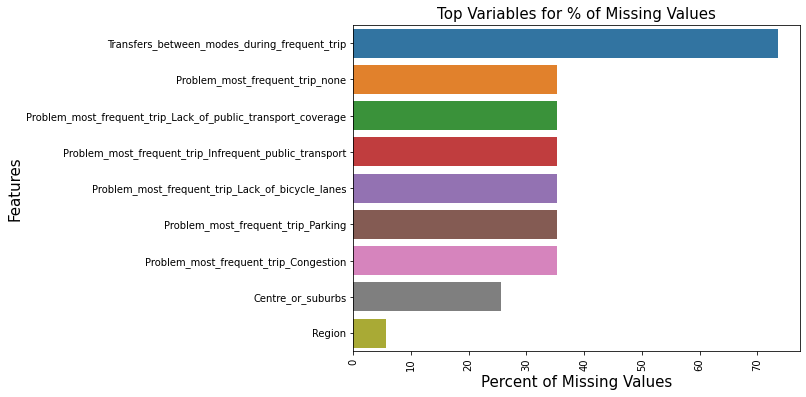

In [8]:
f, ax = plt.subplots(figsize=(8,6))
plt.xticks(rotation='90')
sns.barplot(y=df_na.index[:10], x=df_na[:10])
plt.ylabel('Features', fontsize=15)
plt.xlabel('Percent of Missing Values', fontsize=15)
plt.title('Top Variables for % of Missing Values', fontsize=15)

#### Impute categorical missing values

---

We know that all missing values are categorical data, in particular:

| Variable      | Type |
| ----------- | ----------- |
| Transfers_between_modes_during_frequent_trip | Ordinal |
| Problem_most_frequent_trip_none | Binary |
| Problem_most_frequent_trip_Lack_of_public_transport_coverage | Binary |
| Problem_most_frequent_trip_Infrequent_public_transport | Binary |
| Problem_most_frequent_trip_Lack_of_bicycle_lanes | Binary |
| Problem_most_frequent_trip_Parking | Binary |
| Problem_most_frequent_trip_Congestion | Binary |
| Centre_or_suburbs | Binary |
| Region | Nominal |



##### Region

In [9]:
df["Region"] = df["Region"].fillna(df["Country"])

##### ? Transfers_between_modes_during_frequent_trip

<font color='red'>TODO:</font> 
* is "Transfers_between_modes_during_frequent_trip" an interesting variable? Check papers
  *   very high missing ratio
  *   apparently not very important, i.e. not mentioned in the papers (check)
* add an additional value to the binary variables?





In [10]:
var = 'Transfers_between_modes_during_frequent_trip'

In [11]:
df[var].unique()

array([nan, "Don't know/ No answer", 'Two', 'One', 'More than three',
       'Three'], dtype=object)

In [12]:
df[df[var] == 'One']

,Country,Gender,Age,Education,Region,Profession,Work_status,Household_members,Income_level,Location_of_resudence,Centre_or_suburbs,Public_transport_service,Car_driving_license,Number_vehicles_in_household,Considering_electric_or_hybrid_vehicle_next_purchase,Know_what_car_sharing_is,Would_subsribe_car_sharing_if_available,Most_frequent_trip_Walk,Most_frequent_trip_Bicycle,Most_frequent_trip_Car_as_Driver,Most_frequent_trip_Car_as_Passenger,Most_frequent_trip_Train,Most_frequent_trip_Underground_or_light_train,Most_frequent_trip_Tram,Most_frequent_trip_Bus,Most_frequent_trip_Motorcycle_or_moped,Destination_most_frequent_trip,Frequency_most_frequent_trip,Problem_most_frequent_trip_Congestion,Problem_most_frequent_trip_Parking,Problem_most_frequent_trip_Lack_of_bicycle_lanes,Problem_most_frequent_trip_Infrequent_public_transport,Problem_most_frequent_trip_Lack_of_public_transport_coverage,Problem_most_frequent_trip_none,Transfers_between_modes_during_frequent_trip,Frequent_trip_duration_in_minutes,Frequent_trip_distance,Concern_environmental_impacts,Preference_tolls_or_traffic_limitation
10,Poland,Male,36,Upper secondary (high school or similar);,Mazowieckie,other employed worker,Employed,one (myself),high,Metropolitan area of a big city with more than...,in the suburbs,Well served by public transport,Yes,1,Maybe yes maybe not,No,Yes without any influence on my car ownership,No,No,No,No,No,Yes,No,Yes,No,"…In an urban area, same as where I live",Make this trip every day/ every working day of...,NaN,NaN,NaN,NaN,NaN,NaN,One,40,6-10 KM,5,Definitely more acceptable to pay for less con...
15,Finland,Female,29,"Tertiary and higher (University degree, PhD or...",Helsinki-Uusimaa,office worker,Employed,two,middle,Metropolitan area of a big city with more than...,in the suburbs,Well served by public transport,Yes,1,Probably yes,Yes,"Yes, instead of purchasing a new car",No,No,No,No,No,No,Yes,Yes,No,"…In an urban area, same as where I live",Make this trip every day/ every working day of...,NaN,NaN,NaN,NaN,NaN,NaN,One,35,6-10 KM,8,Probably more acceptable to pay for less conge...
18,Czech Republic,Male,31,"Tertiary and higher (University degree, PhD or...",Praha,other employed worker,Employed,one (myself),higher middle,Metropolitan area of a big city with more than...,in the centre of the city,Well served by public transport,Yes,1,Maybe yes maybe not,Yes,"Maybe yes, maybe not. I would need to test the...",No,Yes,No,No,No,Yes,Yes,No,No,"…In an urban area, same as where I live",Make this trip every day/ every working day of...,NaN,NaN,NaN,NaN,NaN,NaN,One,35,6-10 KM,9,Definitely more acceptable to pay for less con...
28,Poland,Female,25,"Tertiary and higher (University degree, PhD or...",Lódzkie,other employed worker,Employed,four,lower middle,Small or medium town (less than 250.000 inhabi...,in the suburbs,Relatively served by public transport,Yes,2,Probably not,No,"Maybe yes, maybe not. I would need to test the...",No,No,Yes,Yes,No,No,No,No,No,"…In an urban area, same as where I live",Make this trip every day/ every working day of...,Yes,Yes,No,No,No,No,One,30,21-30 KM,7,No preferences
29,Czech Republic,Male,35,Upper secondary (high school or similar);,Severovýchod,middle manager,Employed,one (myself),middle,Small or medium town (less than 250.000 inhabi...,in the centre of the city,Well served by public transport,No,0,Maybe yes maybe not,Unsure/ no answer,"No, I would not be interested in this service",Yes,No,No,No,No,No,No,Yes,No,"…In an urban area, same as where I live",Make this trip every day/ every working day of...,NaN,NaN,NaN,NaN,NaN,NaN,One,35,3-5 KM,9,No preferences
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26453,Cyprus,Female,63,Upper secondary (high school or similar);,Cyprus,retired,Not Employed,five,middle,Large city (from 250.000 to 1.000.000 inhabita...,in the centre of the city,Well served by public transport,Y

In [13]:
# df[var] = df[var].fillna()

In [14]:
df[target_variable].unique()

array(['Maybe yes maybe not', 'Probably not', 'Certainly not',
       'Probably yes', "Don't know/no answer", 'Certainly yes'],
      dtype=object)

In [15]:
target_answers = df[target_variable].value_counts(normalize=True) * 100
target_answers

Maybe yes maybe not     30.227401
Probably yes            21.364405
Probably not            19.966172
Certainly yes           10.452922
Certainly not            9.949258
Don't know/no answer     8.039842
Name: Considering_electric_or_hybrid_vehicle_next_purchase, dtype: float64

##### Centre_or_suburbs

create new variable with data coming from rural area

In [16]:
var = 'Centre_or_suburbs'
df[df[var].isnull()]

,Country,Gender,Age,Education,Region,Profession,Work_status,Household_members,Income_level,Location_of_resudence,Centre_or_suburbs,Public_transport_service,Car_driving_license,Number_vehicles_in_household,Considering_electric_or_hybrid_vehicle_next_purchase,Know_what_car_sharing_is,Would_subsribe_car_sharing_if_available,Most_frequent_trip_Walk,Most_frequent_trip_Bicycle,Most_frequent_trip_Car_as_Driver,Most_frequent_trip_Car_as_Passenger,Most_frequent_trip_Train,Most_frequent_trip_Underground_or_light_train,Most_frequent_trip_Tram,Most_frequent_trip_Bus,Most_frequent_trip_Motorcycle_or_moped,Destination_most_frequent_trip,Frequency_most_frequent_trip,Problem_most_frequent_trip_Congestion,Problem_most_frequent_trip_Parking,Problem_most_frequent_trip_Lack_of_bicycle_lanes,Problem_most_frequent_trip_Infrequent_public_transport,Problem_most_frequent_trip_Lack_of_public_transport_coverage,Problem_most_frequent_trip_none,Transfers_between_modes_during_frequent_trip,Frequent_trip_duration_in_minutes,Frequent_trip_distance,Concern_environmental_impacts,Preference_tolls_or_traffic_limitation
14,Italy,Male,43,Upper secondary (high school or similar);,Veneto,other employed worker,Employed,one (myself),middle,Rural area,NaN,Relatively served by public transport,Yes,1,Certainly yes,Yes,"Maybe yes, maybe not. I would need to test the...",Yes,No,Yes,No,Yes,No,No,No,No,"…In an urban area, same as where I live",Make this trip every day/ every working day of...,Yes,Yes,No,No,No,No,Don't know/ No answer,15,6-10 KM,8,No preferences
16,Belgium,Male,50,Lower secondary (upper elementary school or si...,Prov. Hainaut,office worker,Employed,two,middle,Rural area,NaN,Difficult to reach with public transport,Yes,1,Probably yes,Yes,"Maybe yes, maybe not. I would need to test the...",No,No,Yes,No,No,No,No,No,No,"…In an urban area, different from where I live",Make this trip every day/ every working day of...,Yes,No,No,No,No,No,NaN,60,more than 50 KM,8,Probably more acceptable to limit road traffic
17,Italy,Female,38,Upper secondary (high school or similar);,Friuli-Venezia Giulia,housewife,Not Employed,five,middle,Rural area,NaN,Relatively served by public transport,Yes,2,Probably yes,Unsure/ no answer,"Maybe yes, maybe not. I would need to test the...",No,No,Yes,No,No,No,No,No,No,"…In an urban area, same as where I live",Make this trip every day/ every working day of...,No,Yes,No,No,No,No,NaN,5,less than 3 KM,7,Probably more acceptable to limit road traffic
20,Netherlands,Female,36,Upper secondary (high school or similar);,Noord-Brabant,housewife,Not Employed,five,middle,Rural area,NaN,Relatively served by public transport,Yes,1,Don't know/no answer,No,"No, I would not be interested in this service",No,No,No,Yes,No,No,No,No,No,"…In an urban area, same as where I live",Make this trip once per week or less,No,Yes,No,No,No,No,NaN,10,6-10 KM,9,No preferences
22,Sweden,Male,46,Upper secondary (high school or similar);,Västsverige,storekeeper/tradesman/craftsman,Employed,more than five,middle,Rural area,NaN,Not served by public transport,Yes,1,Certainly not,No,"No, I would not be interested in this service",No,No,Yes,Yes,No,No,No,No,No,"…In an urban area, different from where I live",Make this trip every day/ every working day of...,No,No,No,No,No,Yes,Don't know/ No answer,25,21-30 KM,Don't know,No preferences
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26557,Cyprus,Female,32,Upper secondary (high school or similar);,Cyprus,office worker,Employed,four,lower middle,Rural area,NaN,Relatively served by public transport,Yes,2,Maybe yes maybe not,Yes,"Maybe yes, maybe not. I would need to test the...",No,No,Yes,No,No,No,No,No,No,"…In an urban area, same as where I live",Make this trip every day/ every working day of...,No,No,No,No,No,Yes,NaN,10,11-20 KM,5,Probably more acceptable to limit road traffic
26575,Cyprus,Female,56,Primary (elementary school 

In [17]:
df.loc[df[var].isnull(), var] = 'Rural area'

## Overview

In [18]:
df

,Country,Gender,Age,Education,Region,Profession,Work_status,Household_members,Income_level,Location_of_resudence,Centre_or_suburbs,Public_transport_service,Car_driving_license,Number_vehicles_in_household,Considering_electric_or_hybrid_vehicle_next_purchase,Know_what_car_sharing_is,Would_subsribe_car_sharing_if_available,Most_frequent_trip_Walk,Most_frequent_trip_Bicycle,Most_frequent_trip_Car_as_Driver,Most_frequent_trip_Car_as_Passenger,Most_frequent_trip_Train,Most_frequent_trip_Underground_or_light_train,Most_frequent_trip_Tram,Most_frequent_trip_Bus,Most_frequent_trip_Motorcycle_or_moped,Destination_most_frequent_trip,Frequency_most_frequent_trip,Problem_most_frequent_trip_Congestion,Problem_most_frequent_trip_Parking,Problem_most_frequent_trip_Lack_of_bicycle_lanes,Problem_most_frequent_trip_Infrequent_public_transport,Problem_most_frequent_trip_Lack_of_public_transport_coverage,Problem_most_frequent_trip_none,Transfers_between_modes_during_frequent_trip,Frequent_trip_duration_in_minutes,Frequent_trip_distance,Concern_environmental_impacts,Preference_tolls_or_traffic_limitation
0,Belgium,Female,49,Upper secondary (high school or similar);,Prov. Oost-Vlaanderen,housewife,Not Employed,two,lower middle,Metropolitan area of a big city with more than...,in the suburbs,Well served by public transport,Yes,1,Maybe yes maybe not,Yes,"Maybe yes, maybe not. I would need to test the...",No,No,Yes,No,No,No,No,No,No,…It is outside an urban area,Make this trip every day/ every working day of...,Yes,Yes,No,No,No,No,NaN,20,3-5 KM,5,No preferences
1,France,Male,26,"Tertiary and higher (University degree, PhD or...",Pays de la Loire,unemployed,Not Employed,four,low,Small or medium town (less than 250.000 inhabi...,in the centre of the city,Difficult to reach with public transport,Yes,3,Probably not,Yes,"Maybe yes, maybe not. I would need to test the...",No,No,Yes,No,No,No,No,No,No,"…In an urban area, different from where I live",Make this trip 2-3 days per week,No,Yes,No,Yes,Yes,No,NaN,20,11-20 KM,8,Probably more acceptable to limit road traffic
2,Czech Republic,Male,50,"Tertiary and higher (University degree, PhD or...",Jihovýchod,other employed worker,Employed,four,middle,Large city (from 250.000 to 1.000.000 inhabita...,in the suburbs,Well served by public transport,Yes,1,Certainly not,Yes,"No, I would not be interested in this service",Yes,Yes,Yes,No,No,No,No,No,No,"…In an urban area, same as where I live",Make this trip every day/ every working day of...,Yes,No,Yes,No,No,No,Don't know/ No answer,20,less than 3 KM,6,No preferences
3,Sweden,Male,54,"Tertiary and higher (University degree, PhD or...",Stockholm,teacher/lecturer,Employed,four,higher middle,Metropolitan area of a big city with more than...,in the suburbs,Relatively served by public transport,Yes,1,Maybe yes maybe not,Unsure/ no answer,Don't know / No answer,No,No,No,No,No,Yes,No,No,No,"…In an urban area, same as where I live",Make this trip every day/ every working day of...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,11-20 KM,8,Probably more acceptable to pay for less conge...
4,Poland,Male,36,Upper secondary (high school or similar);,Pomorskie,manual worker/agricultural worker/farmer,Employed,four,higher middle,Metropolitan area of a big city with more than...,in the suburbs,Well served by public transport,No,1,Probably yes,No,"Maybe yes, maybe not. I would need to test the...",No,No,No,No,No,No,No,No,Yes,"…In an urban area, same as where I live",Make this trip every day/ every working day of...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,11-20 KM,8,No preferences
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26600,Cyprus,Female,28,"Tertiary and higher (University degree, PhD or...",Cyprus,middle manager,Employed,three,lower middle,Rural area,Rural area,Relatively served by public transport,Yes,3,Don't know/no answer,No,"Yes, instead of purchasing a new car",No,No,Yes,No,No,No,No,No,No

## Similarity coefficient

similarity_between

s1 and s2 are vectors
$$s(S_1,S_2) = \sum_{i \in S_2} \frac{|s_{2_i}-s_{1_i}|}{|S_2|}$$

$$S_2$$ must have less elements than $$S_1$$ because in our application, if someone has not answered to the question with a particular answer, there would be no samples for that answer to check the similarity

In [19]:
def similarity_between(s1, s2):
  '''
    0 when identical, higher otherwise, kind of like std dev
    len(s2) <= len(s1)
  '''
  corr = 0
  for key, value in s2.items():
    corr += abs(value-s1[key])
  corr /= len(s2)
  return corr

def correlation_target_on_not_null_input(var):
  target_answers_on_var_not_null = df.loc[df[var].notnull(), target_variable] \
    .value_counts(normalize=True) * 100
  # for target_answer, answer_freq in target_answers.items():
  #   print(target_answer, answer_freq)
  return similarity_between(target_answers, target_answers_on_var_not_null)

correlation_target_on_not_null_input_dict = pd.Series(dtype=np.float64)
for var in missing_value_variables:
  corr = correlation_target_on_not_null_input(var)
  correlation_target_on_not_null_input_dict[var] = corr
  print(f'corr {var}: {corr}')

corr Transfers_between_modes_during_frequent_trip: 1.1611004623781351
corr Problem_most_frequent_trip_none: 0.9246642368502287
corr Problem_most_frequent_trip_Lack_of_public_transport_coverage: 0.9246642368502287
corr Problem_most_frequent_trip_Infrequent_public_transport: 0.9246642368502287
corr Problem_most_frequent_trip_Lack_of_bicycle_lanes: 0.9246642368502287
corr Problem_most_frequent_trip_Parking: 0.9246642368502287
corr Problem_most_frequent_trip_Congestion: 0.9246642368502287
corr Centre_or_suburbs: 0.0
corr Region: 0.0


Those input variables that have high corr, the meaning is that the subset of people that have responded to those questions is interesting because it is different, thus they have replied differently to our target question.

conditional probability

TODO: math mode distribution

$$  $$

similarity_target_vs_input(v)

1. corr: similarity between target question and a given question

- $a$ is an answer for the question $q$ (variable in the code), 
- $A$ is all the answers,
- $A_a$ is the number of answers with that particular answer
- $T$ a priori probability for target question
- $T_{v_a}$ a posteriori probability (with that answer)
$$ \sum_{a \in A}{\frac{|A_a|s(T,T_{q_a})}{|A|}} $$

2. max_corr_answer: the question with max corr
$$ \underset{a}{\arg\max}(s(T, T_{q_a}) $$

In [20]:
def conditional_probability(var, answer):
  target_vs_var = df.loc[df[var].notnull(), [target_variable, var]]
  return target_vs_var.loc[target_vs_var[var]==answer, target_variable] \
      .value_counts(normalize=True) * 100

def similarity_target_vs_input(var):
  target_vs_var = df.loc[df[var].notnull(), [target_variable, var]]
  # a priori probability
  target_series = target_vs_var[target_variable] \
    .value_counts(normalize=True) * 100
  corr = 0
  max_corr = 0
  max_corr_answer = ""
  for answer in target_vs_var[var].unique():
    # conditional probability
    target_series_for_var_answer = conditional_probability(var, answer)
    answer_corr = similarity_between(target_series, target_series_for_var_answer)
    if answer_corr > max_corr:
      max_corr = answer_corr
      max_corr_answer = answer
    corr += answer_corr * target_vs_var[var].value_counts()[answer]

  corr /= len(target_vs_var[var]) # normalize
  return corr, max_corr_answer


    

In [21]:
def answers_distribution(var):
  cp_df = pd.DataFrame()

  for answer in df[var].unique():
    #print(answer)
    n_of_answers_series = pd.Series(df[var].value_counts()[answer], index=['#'])
    target_series_for_var_answer = conditional_probability(var, answer)
    target_vs_var = df.loc[df[var].notnull(), [target_variable, var]]
    # a priori probability
    target_series = target_vs_var[target_variable] \
      .value_counts(normalize=True) * 100
    corr_series = similarity_between(target_series, target_series_for_var_answer)
    corr_series = n_of_answers_series.append(pd.Series(corr_series, index=["corr"]))
    cp_df[answer] = corr_series.append(target_series_for_var_answer)
    cp_df
  return cp_df

In [22]:
def plot_answers_similarity(var):
  fig, ax = plt.subplots(figsize=(12, 12))
  plt.xticks(rotation='90')
  s = answers_distribution(var).transpose()
  # s = s.sort_values(by=['Country', 'Region'])
  # s['Region'] = s['Country'] + ', ' + s['Region']
  sns.histplot(y=s['corr'], x=s['#'])
  plt.xlabel('Answers', fontsize=15)
  plt.ylabel('Similarity Index', fontsize=15)
  plt.title(var, fontsize=15)

### Group Values

#### Frequent_trip_duration_in_minutes

In [23]:
var = "Frequent_trip_duration_in_minutes"
cp_df = pd.DataFrame()

for answer in np.sort(df[var].unique()):
  #print(answer)
  n_of_answers_series = pd.Series(df[var].value_counts()[answer], index=['#'])
  cp_df[answer] = n_of_answers_series.append(conditional_probability(var, answer))
cp_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,315,320,330,332,333,340,350,356,360,365,380,390,397,400,420,422,450,466,480,490,491,495,510,520,525,540,548,550,570,580,600,605,610,615,630,672,720,750,765,775
#,19.000000,25.0,39.000000,77.000000,40.0,987.000000,69.000000,192.000000,131.000000,19.000000,2524.000000,16.00,188.000000,61.000000,33.000000,3399.000000,19.000000,58.000000,67.000000,3.000000,3484.000000,10.0,25.0,22.000000,13.000000,1382.000000,8.0,10.0,16.00,5.0,3884.000000,2.0,10.0,6.000000,7.000000,801.000000,5.0,5.0,8.0,2.0,...,2.0,2.0,13.000000,1.0,1.0,1.0,2.0,1.0,9.000000,1.0,3.000000,7.000000,1.0,1.0,5.0,1.0,1.0,1.0,10.0,2.0,1.0,3.000000,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,9.000000,2.0,1.0,1.0
Maybe yes maybe not,31.578947,12.0,25.641026,33.766234,30.0,31.003040,33.333333,27.083333,31.297710,31.578947,30.784469,25.00,26.063830,24.590164,39.393939,30.097087,21.052632,31.034483,32.835821,NaN,30.625718,60.0,32.0,36.363636,7.692308,31.331404,25.0,30.0,43.75,40.0,31.951596,50.0,40.0,16.666667,28.571429,31.835206,20.0,40.0,50.0,50.0,...,NaN,NaN,30.769231,NaN,NaN,NaN,NaN,NaN,22.222222,NaN,33.333333,28.571429,NaN,NaN,NaN,NaN,NaN,100.0,30.0,NaN,100.0,33.333333,NaN,50.0,100.0,50.0,100.0,NaN,NaN,NaN,NaN,100.0,50.0,NaN,50.0,NaN,33.333333,50.0,NaN,NaN
Probably not,21.052632,20.0,28.205128,25.974026,30.0,21.073961,20.289855,25.000000,24.427481,10.526316,22.424723,31.25,23.404255,21.311475,30.303030,21.565166,21.052632,18.965517,19.402985,33.333333,20.895522,10.0,20.0,22.727273,30.769231,21.128799,62.5,20.0,37.50,NaN,19.309990,NaN,10.0,NaN,28.571429,18.726592,20.0,40.0,12.5,NaN,...,NaN,NaN,7.692308,NaN,NaN,100.0,50.0,NaN,22.222222,100.0,NaN,NaN,NaN,NaN,80.0,NaN,100.0,NaN,10.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
Probably yes,15.789474,16.0,17.948718,15.584416,15.0,19.858156,20.289855,17.708333,20.610687,31.578947,19.453249,NaN,18.617021,29.508197,12.121212,20.270668,NaN,20.689655,19.402985,66.666667,21.526980,10.0,12.0,13.636364,30.769231,21.273517,12.5,40.0,12.50,40.0,21.987642,NaN,10.0,16.666667,14.285714,23.096130,60.0,20.0,NaN,NaN,...,50.0,NaN,30.769231,100.0,NaN,NaN,NaN,NaN,22.222222,NaN,33.333333,14.285714,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,50.0,100.0,NaN,100.0,22.222222,50.0,NaN,NaN
Certainly not,15.789474,28.0,10.256410,9.090909,5.0,10.638298,5.797101,12.500000,9.160305,5.263158,10.301109,6.25,11.702128,11.475410,6.060606,9.032068,21.052632,8.620690,5.970149,NaN,9.357061,10.0,12.0,4.545455,23.076923,9.479016,NaN,NaN,NaN,NaN,9.294542,50.0,30.0,33.333333,14.285714,9.113608,NaN,NaN,12.5,NaN,...,50.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,22.222222,NaN,33.333333,28.571429,NaN,100.0,20.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,100.0,NaN,100.0,NaN,NaN,NaN,NaN,50.0,NaN,11.111111,NaN,NaN,NaN
Certainly yes,10.526316,8.0,7.692308,5.194805,17.5,9.625127,11.594203,10.416667,9.923664,15.789474,9.152139,31.25,13.297872,4.918033,9.090909,10.414828,31.578947,10.344828,14.925373,NaN,10.160735,NaN,16.0,13.636364,7.692308,9.840810,NaN,NaN,6.25,20.0,9.552008,NaN,10.0,NaN,14.285714,11.235955,NaN,NaN,25.0,NaN,...,NaN,50.0,7.692308,NaN,100.0,NaN,50.0,100.0,NaN,NaN,NaN,14.285714,NaN,NaN,NaN,100.0,NaN,NaN,10.0,NaN,NaN,NaN,50.0,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.111111,NaN,NaN,NaN
Don't know/no answer,5.263158,16.0,10.256410,10.389610,2.5,7.801418,8.695652,7.291667,4.580153,5.263158,7.884311,6.25,6.914894,8.196721,3.030303,8.620182,5.263158,10.344828,7.462687,NaN,7.433984,10.0,8.0,9.090909,NaN,6.946454,NaN,10.0,NaN,NaN,7.904222,NaN,NaN,33.333333,NaN,5.992509,NaN,NaN,NaN,50.0,...,NaN,NaN,23.076923,NaN,NaN,NaN,NaN,NaN,11.111111,NaN,NaN,14.285714,100.0,NaN,NaN,NaN,NaN,NaN,10.0,50.0,NaN,66.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.222222,NaN,100.0,NaN


Text(0.5, 1.0, 'Frequent_trip_duration_in_minutes')

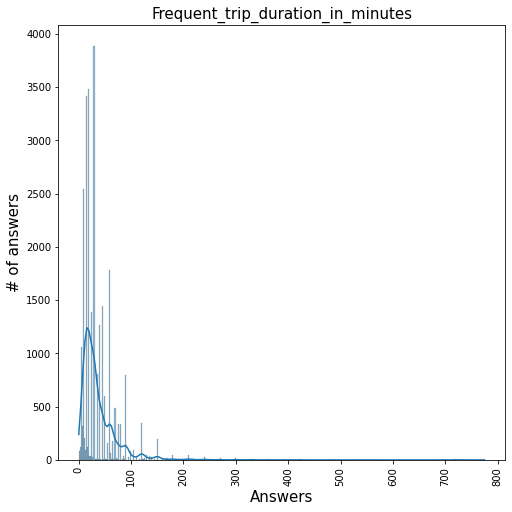

In [24]:
s = df[var].value_counts()
# var_series = pd.Series(s.index.values, index=s )
# var_series.hist(bins=800)
fig, ax = plt.subplots(figsize=(8,8))
plt.xticks(rotation='90')
# sns.barplot(x=df_na.index[:10], y=df_na[:10])
sns.histplot(df[var], kde=True)
plt.xlabel('Answers', fontsize=15)
plt.ylabel('# of answers', fontsize=15)
plt.title(var, fontsize=15)

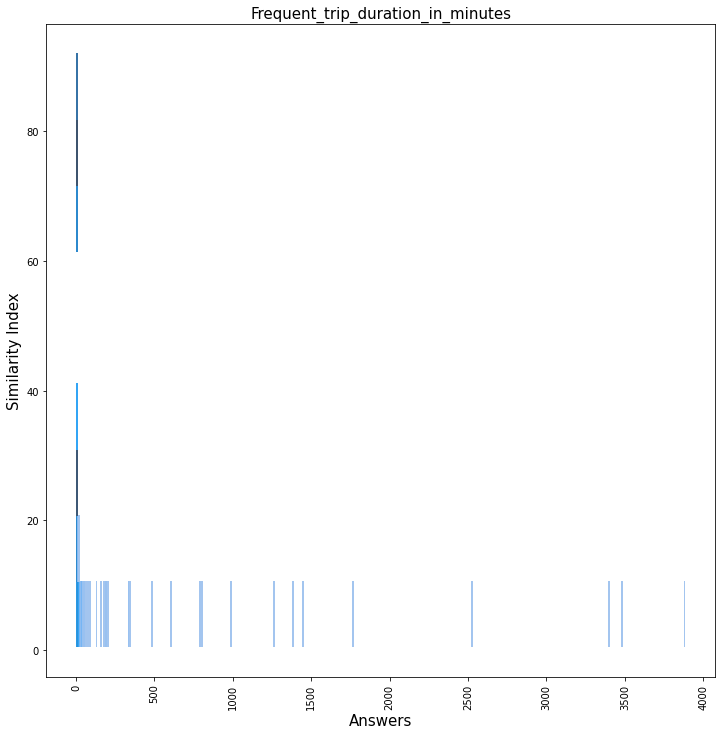

In [25]:
plot_answers_similarity(var)

In [26]:
groups = 10
answers_per_group = len(df[var]) / groups

n_of_answers = 0  # growing
splitting_list = []
for i, answer in enumerate(np.sort(df[var].unique())):
  n_of_answers += df[var].value_counts()[answer]
  if n_of_answers >= len(splitting_list) * answers_per_group:
    splitting_list.append(answer)
splitting_list[-1] = max(df[var]) + 1

splitting_list


[0, 10, 15, 20, 21, 30, 31, 40, 60, 75, 776]

In [27]:
for split in range(len(splitting_list[:-1])):
  print(f'{splitting_list[split]}:{splitting_list[split+1]}')
  df.loc[(splitting_list[split] <= df[var]) & (df[var] < splitting_list[split+1]), ["grouped_"+var]] = \
    f'{splitting_list[split]}:{splitting_list[split+1]}'

0:10
10:15
15:20
20:21
21:30
30:31
31:40
40:60
60:75
75:776


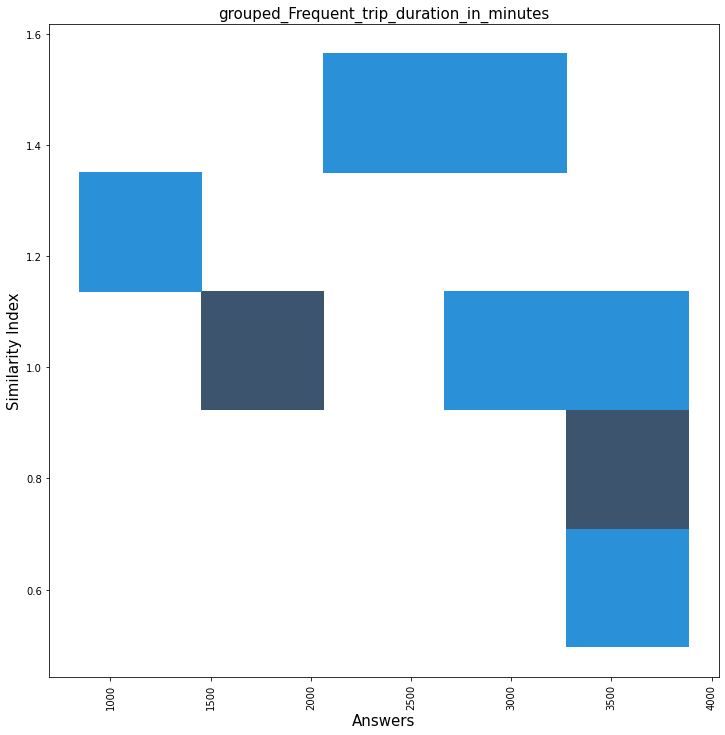

In [28]:
plot_answers_similarity("grouped_"+var)

#### Region

In [29]:
var = "Region"
cp_df = pd.DataFrame()

for answer in df[var].unique():
  #print(answer)
  n_of_answers_series = pd.Series(df[var].value_counts()[answer], index=['#'])
  target_series_for_var_answer = conditional_probability(var, answer)
  target_vs_var = df.loc[df[var].notnull(), [target_variable, var]]
  # a priori probability
  target_series = target_vs_var[target_variable] \
    .value_counts(normalize=True) * 100
  corr_series = similarity_between(target_series, target_series_for_var_answer)
  corr_series = n_of_answers_series.append(pd.Series(corr_series, index=["corr"]))
  cp_df[answer] = corr_series.append(target_series_for_var_answer)
cp_df

,Prov. Oost-Vlaanderen,Pays de la Loire,Jihovýchod,Stockholm,Pomorskie,Prov. West-Vlaanderen,Észak-Magyarország,Västsverige,Île de France,Prov. Vlaams-Brabant,Mazowieckie,Mecklenburg-Vorpommern,Cataluńa,Syddanmark,Veneto,Helsinki-Uusimaa,Prov. Hainaut,Friuli-Venezia Giulia,Praha,Strední Morava,Noord-Brabant,Région de Bruxelles-Capitale / Brussels Hoofdstedelijk Gewest,Sud-Vest Oltenia,Strední Cechy,Lódzkie,Severovýchod,Oberbayern,Hovedstaden,Niederbayern,Emilia-Romagna,Comunidad de Madrid,Franche-Comté,Länsi-Suomi,Utrecht,Sud - Muntenia,Észak-Alföld,Kujawsko-Pomorskie,Prov. Antwerpen,Jihozápad,Midtjylland,...,Pozesko-slavonska zupanija,Auvergne,Midi-Pyrénées,Basse-Normandie,Taurages apskritis,Dolnoslaskie,Aragón,Zachodniopomorskie,Lubuskie,Limousin,East Wales,Lüneburg,Extremadura,Shropshire and Staffordshire,Poitou-Charentes,Cantabria,Prov. Brabant Wallon,"Surrey, East and West Sussex",Swietokrzyskie,Región de Murcia,Jugovzhodna Slovenija,???e?? ???a??,Sibensko-kninska zupanija,Panevezio apskritis,Corse,Zasavska,Licko-senjska zupanija,Tübingen,La Rioja,Provincia Autonoma di Trento,Alytaus apskritis,Alentejo,Koblenz,Oberpfalz,Valle d'Aosta/Vallée d'Aoste,Molise,Algarve,Malta,Louxembourg,Cyprus
#,133.000000,57.000000,138.000000,228.000000,76.000000,107.000000,130.000000,202.000000,185.000000,96.000000,148.000000,37.000000,159.000000,228.000000,65.000000,267.000000,120.000000,31.000000,121.000000,125.000000,151.000000,105.000000,107.000000,127.000000,56.000000,131.000000,58.000000,325.000000,14.000000,88.000000,138.000000,15.000000,279.000000,74.000000,130.000000,114.000000,46.000000,161.000000,104.000000,224.000000,...,18.000000,15.000000,43.000000,21.000000,30.000000,81.000000,33.000000,45.000000,18.000000,19.000000,18.000000,6.000000,22.000000,12.000000,20.000000,6.000000,27.000000,36.000000,24.000000,21.000000,69.000000,10.000000,13.000000,84.000000,5.000000,26.000000,4.000000,4.000000,6.000000,5.000000,48.000000,29.000000,5.000000,7.000000,1.000000,1.000000,31.000000,500.000000,505.000000,500.000000
corr,7.405904,9.243833,6.280892,4.081582,2.361431,7.490511,2.570608,4.167261,3.387293,4.702998,3.237868,6.208039,5.653884,7.962278,9.394224,2.828892,6.705611,7.600584,3.368368,6.339109,4.678385,6.784976,4.970548,5.356432,4.848288,4.244453,3.596377,6.425166,16.039547,9.469982,5.749591,5.852283,4.245633,4.648554,4.406584,2.685772,4.616327,5.843871,5.157058,6.395862,...,2.927770,5.765416,8.495838,3.554899,5.771054,5.067954,8.936499,3.919202,9.883522,8.019466,6.086158,8.495897,7.289926,6.750298,6.727307,37.764831,8.707024,5.982167,7.827998,9.117826,3.097816,10.305394,8.733249,4.486312,10.896448,5.774652,13.456117,17.407129,16.456806,16.876527,3.262362,6.904631,34.091336,5.101834,91.960158,69.772599,6.069115,2.411138,6.157010,5.038476
Maybe yes maybe not,41.353383,36.842105,37.681159,32.894737,28.947368,32.710280,23.846154,34.653465,30.810811,40.625000,27.027027,35.135135,32.704403,27.192982,23.076923,24.344569,36.666667,22.580645,37.190083,36.000000,36.423841,38.095238,25.233645,36.220472,33.928571,32.824427,24.137931,27.384615,7.142857,23.863636,38.405797,46.666667,24.372760,33.783784,23.846154,36.842105,23.913043,34.161491,35.576923,28.125000,...,33.333333,20.000000,48.837209,38.095238,23.333333,27.160494,27.272727,28.888889,NaN,52.631579,16.666667,33.333333,22.727273,41.666667,25.000000,16.666667,40.740741,33.333333,37.500000,42.857143,34.782609,60.000000,46.153846,33.333333,20.000000,15.384615,50.000000,25.000000,66.666667,NaN,31.250000,31.034483,NaN,28.571429,NaN,100.000000,25.806452,29.400000,34.653465,34.000000
Probably not,29.323308,21.052632,23.913043,19.736842,19.736842,30.841121,19.230769,23.762376,16.756757,22.916667,15.540541,13.513514,13.836478,32.456140,10.769231,23.220974,17.500000,19.354839,21.487603,20.000000,19.205298,18.095238,11.214953,24.409449,14.285714,25.954198,25.862069,25.846154,21.428571,10.227273,14.492754,20.000000,32.258065,16.216216,16.153846,19.298246,28.260870,30.434783,23.076923,26.339286,...,16.666

In [30]:
cp_df.transpose()[cp_df.transpose()['#'] < 50]

,#,corr,Maybe yes maybe not,Probably not,Probably yes,Don't know/no answer,Certainly not,Certainly yes
Mecklenburg-Vorpommern,37.0,6.208039,35.135135,13.513514,35.135135,NaN,10.810811,5.405405
Friuli-Venezia Giulia,31.0,7.600584,22.580645,19.354839,38.709677,NaN,3.225806,16.129032
Niederbayern,14.0,16.039547,7.142857,21.428571,28.571429,NaN,NaN,42.857143
Franche-Comté,15.0,5.852283,46.666667,20.000000,13.333333,6.666667,13.333333,NaN
Kujawsko-Pomorskie,46.0,4.616327,23.913043,28.260870,23.913043,8.695652,15.217391,NaN
...,...,...,...,...,...,...,...,...
Koblenz,5.0,34.091336,NaN,NaN,80.000000,NaN,NaN,20.000000
Oberpfalz,7.0,5.101834,28.571429,28.571429,14.285714,NaN,14.285714,14.285714
Valle d'Aosta/Vallée d'Aoste,1.0,91.960158,NaN,NaN,NaN,100.000000,NaN,NaN
Molise,1.0,69.772599,100.000000,NaN,NaN,NaN,NaN,NaN


**\#** is the number of people who are from that region (so, who answered that region to the question "Region")

**corr** is the similarity index

Text(0.5, 1.0, 'Region')

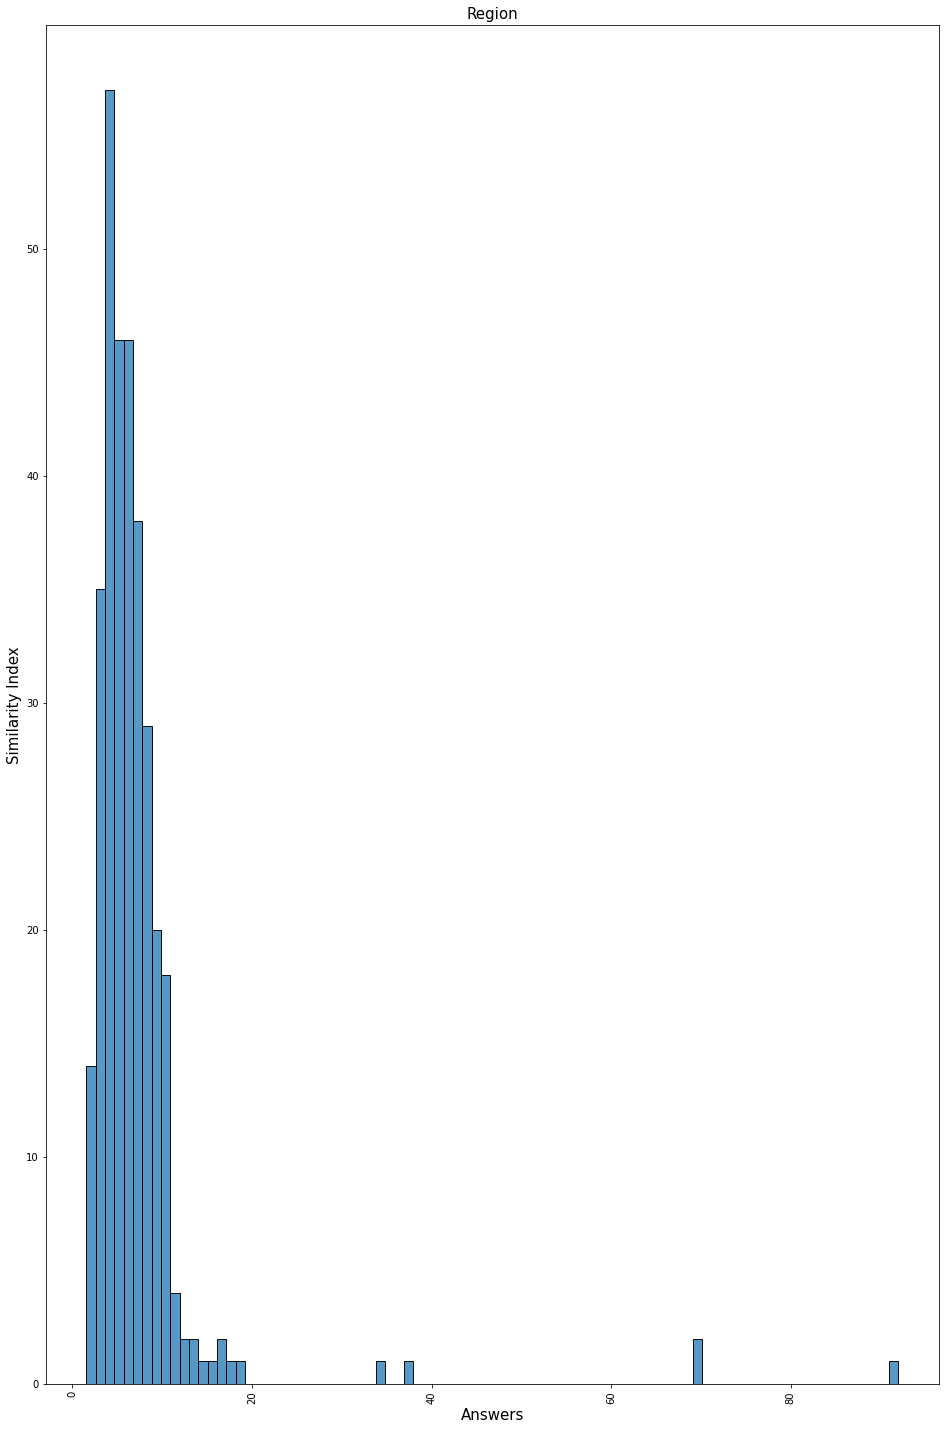

In [31]:
fig, ax = plt.subplots(figsize=(16, 25))
plt.xticks(rotation='90')
s = cp_df.transpose()
# s = s.sort_values(by=['Country', 'Region'])
# s['Region'] = s['Country'] + ', ' + s['Region']
sns.histplot(s['corr'])
plt.xlabel('Answers', fontsize=15)
plt.ylabel('Similarity Index', fontsize=15)
plt.title(var, fontsize=15)

Text(0.5, 1.0, 'Region')

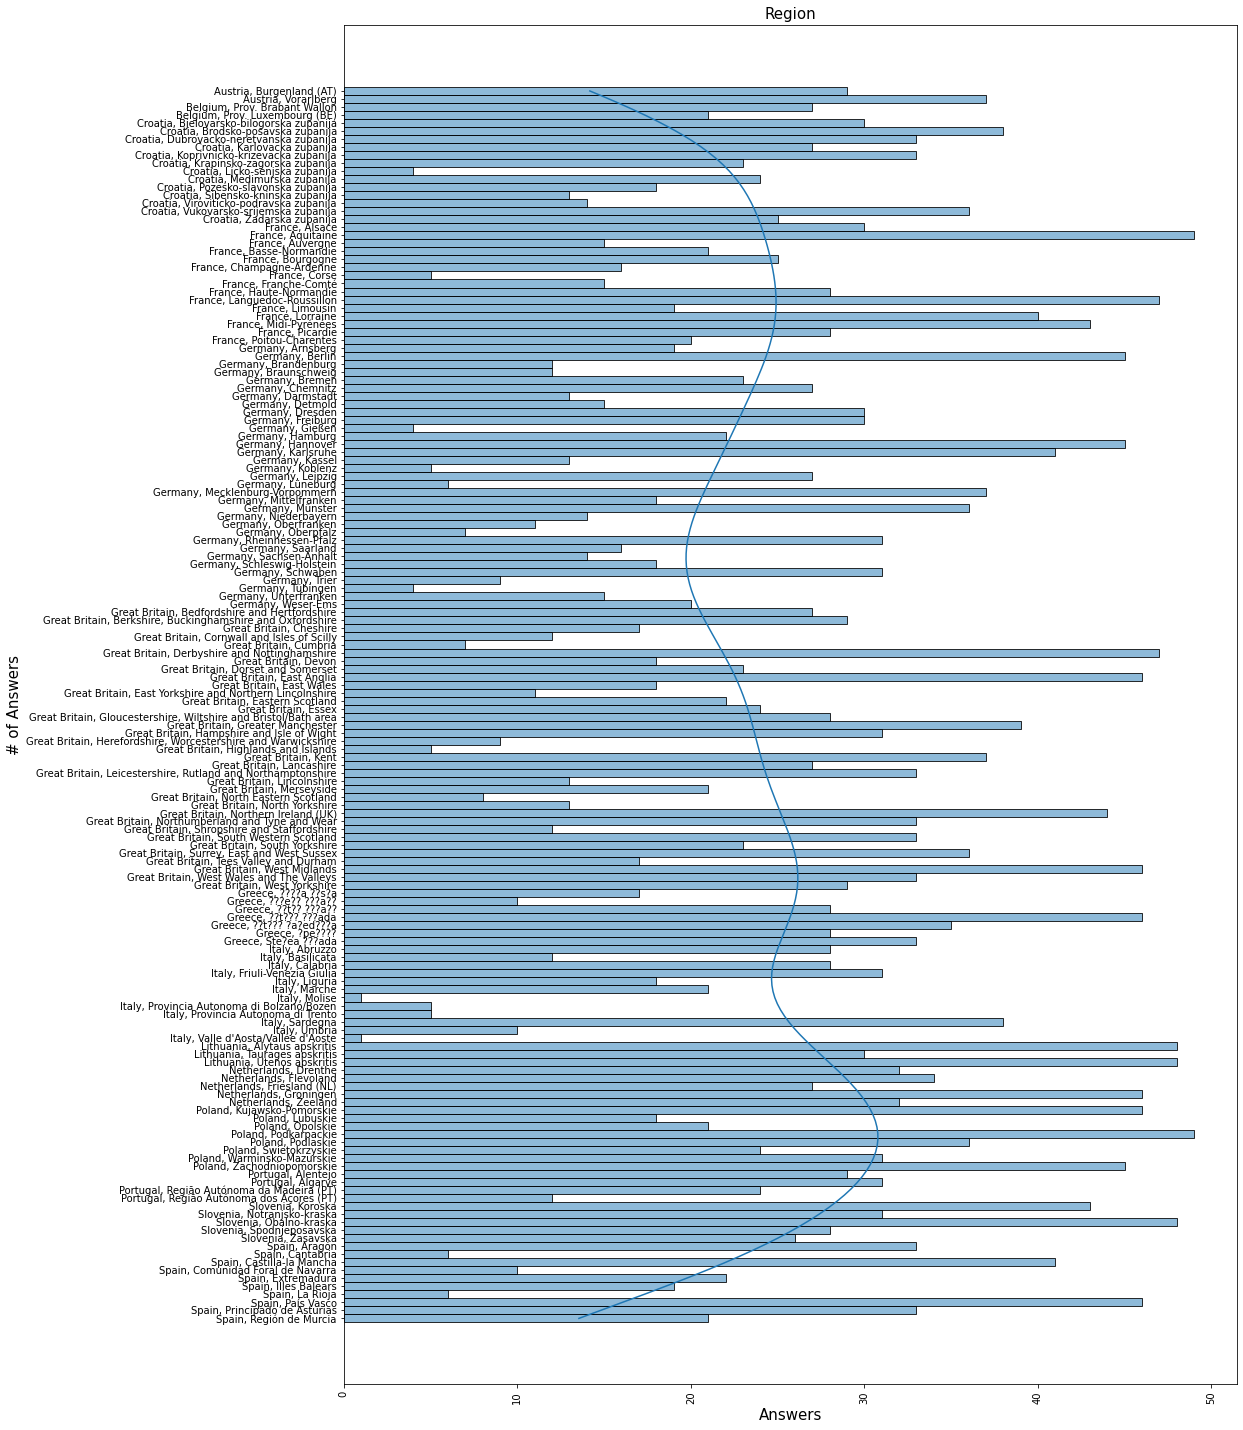

In [32]:

fig, ax = plt.subplots(figsize=(16, 25))
plt.xticks(rotation='90')
filter = df[var].value_counts() < 50
filter = filter[filter]
s = df.loc[df[var].isin(filter.index)]
s = s.sort_values(by=['Country', 'Region'])
s['Region'] = s['Country'] + ', ' + s['Region']
sns.histplot(s, y=var, kde=True)
plt.xlabel('Answers', fontsize=15)
plt.ylabel('# of Answers', fontsize=15)
plt.title(var, fontsize=15)

We found that too many regions have few answers (you can see above how many have less than 50 answers)

So we proceed with alternative groupings.

##### Macro Regions

Starting from macro regions (like Nord-Ovest, Nord-Est for Italy etc..)
We found this dataset here: (googling for "regions for each country in europe")
https://ec.europa.eu/eurostat/cache/digpub/regions/#page6a

[dataset is here](https://appsso.eurostat.ec.europa.eu/nui/show.do?query=BOOKMARK_DS-053896_QID_B066E7C_UID_-3F171EB0&layout=TIME,C,X,0;GEO,L,Y,0;INDIC_IS,L,Z,0;UNIT,L,Z,1;INDICATORS,C,Z,2;&zSelection=DS-053896INDIC_IS,I_IDAY;DS-053896INDICATORS,OBS_FLAG;DS-053896UNIT,PC_IND;&rankName1=UNIT_1_2_-1_2&rankName2=INDICATORS_1_2_-1_2&rankName3=INDIC-IS_1_2_-1_2&rankName4=TIME_1_0_0_0&rankName5=GEO_1_2_0_1&sortC=ASC_-1_FIRST&rStp=&cStp=&rDCh=&cDCh=&rDM=true&cDM=true&footnes=false&empty=false&wai=false&time_mode=NONE&time_most_recent=false&lang=EN&cfo=%23%23%23%2C%23%23%23.%23%23%23)

Chosen because the regions were grouped, and because it's an useful indicator for classifying regions: it represents the indicator of how much internet is used and adopted.
There are other useful indicators, but the regions are more finely grained

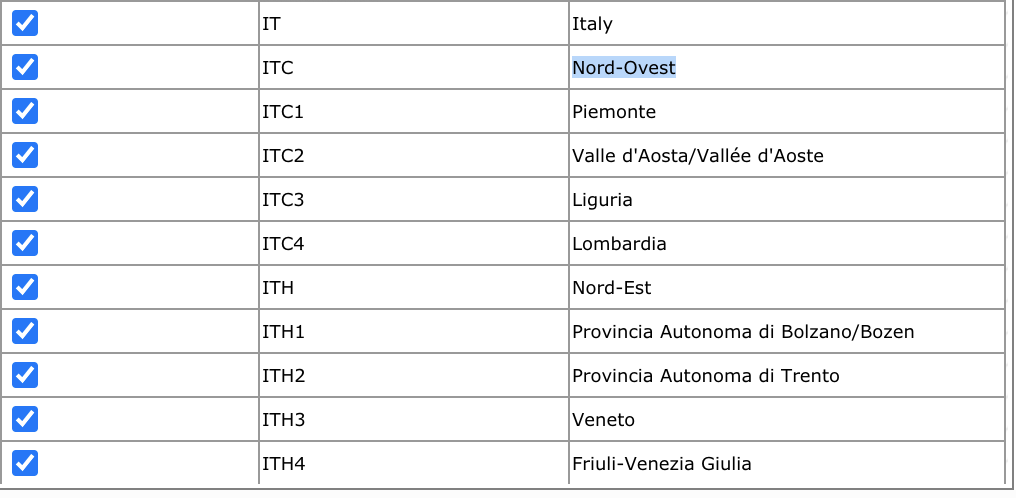

We can see that this dataset groups regions in what we need, group of regions!

In [33]:
# import dataset
ds_path = "/content/drive/MyDrive/MIDA2/IntelligentMobilityProject/Survey+dataset/macro_regions_per_country/regional_grouping.csv"

rg_df = pd.read_csv(ds_path) # region groups
rg_df

,TIME,GEO,GEO_LABEL,INDIC_IS,UNIT,Value,Flag and Footnotes
0,2015,BE,Belgium,Frequency of internet access: daily,Percentage of individuals,73,NaN
1,2015,BE1,Région de Bruxelles-Capitale/Brussels Hoofdste...,Frequency of internet access: daily,Percentage of individuals,73,NaN
2,2015,BE10,Région de Bruxelles-Capitale/Brussels Hoofdste...,Frequency of internet access: daily,Percentage of individuals,73,NaN
3,2015,BE2,Vlaams Gewest,Frequency of internet access: daily,Percentage of individuals,75,NaN
4,2015,BE21,Prov. Antwerpen,Frequency of internet access: daily,Percentage of individuals,73,NaN
...,...,...,...,...,...,...,...
1800,2019,TRA,Kuzeydogu Anadolu,Frequency of internet access: daily,Percentage of individuals,50,NaN
1801,2019,TRB,Ortadogu Anadolu,Frequency of internet access: daily,Percentage of individuals,52,NaN
1802,2019,TRC,Güneydogu Anadolu,Frequency of internet access: daily,Percentage of individuals,45,NaN
1803,2019,BA,Bosnia and Herzegovina,Frequency of internet access: daily,Percentage of individuals,65,NaN


In [ ]:
rg_df = rg_df.loc[rg_df['TIME'] == 2015, ['GEO', 'GEO_LABEL']]
rg_df

,GEO,GEO_LABEL
0,BE,Belgium
1,BE1,Région de Bruxelles-Capitale/Brussels Hoofdste...
2,BE10,Région de Bruxelles-Capitale/Brussels Hoofdste...
3,BE2,Vlaams Gewest
4,BE21,Prov. Antwerpen
...,...,...
356,TRA,Kuzeydogu Anadolu
357,TRB,Ortadogu Anadolu
358,TRC,Güneydogu Anadolu
359,BA,Bosnia and Herzegovina


In [ ]:
rg_df_duplicates = rg_df['GEO_LABEL'].value_counts()
rg_df_duplicates = rg_df_duplicates[rg_df_duplicates > 1]
rg_df_duplicates


Malta                                                          3
Luxembourg                                                     3
Île de France                                                  2
Eesti                                                          2
Bretagne                                                       2
Nord-Est                                                       2
Canarias                                                       2
Latvija                                                        2
Severna Makedonija                                             2
Corse                                                          2
Região Autónoma da Madeira (PT)                                2
Região Autónoma dos Açores (PT)                                2
Pays-de-la-Loire                                               2
Ísland                                                         2
Comunidad de Madrid                                            2
Kypros                   

In [ ]:
rg_df.loc[rg_df['GEO_LABEL'].isin(rg_df_duplicates.index)]

,GEO,GEO_LABEL
1,BE1,Région de Bruxelles-Capitale/Brussels Hoofdste...
2,BE10,Région de Bruxelles-Capitale/Brussels Hoofdste...
59,EE0,Eesti
60,EE00,Eesti
85,ES3,Comunidad de Madrid
86,ES30,Comunidad de Madrid
100,ES7,Canarias
101,ES70,Canarias
103,FR1,Île de France
104,FR10,Île de France


In [ ]:
rg_df = rg_df.drop_duplicates(subset=['GEO_LABEL'])
rg_df

,GEO,GEO_LABEL
0,BE,Belgium
1,BE1,Région de Bruxelles-Capitale/Brussels Hoofdste...
3,BE2,Vlaams Gewest
4,BE21,Prov. Antwerpen
5,BE22,Prov. Limburg (BE)
...,...,...
356,TRA,Kuzeydogu Anadolu
357,TRB,Ortadogu Anadolu
358,TRC,Güneydogu Anadolu
359,BA,Bosnia and Herzegovina


In [ ]:
# df[df['Region'].str.contains("Bruxelles")]
# rg_df.loc[rg_df['GEO_LABEL'].str.contains("Comunidad")]

In [ ]:
len(df['Region'].unique())

322

Try merging..

In [ ]:
df_merge = df[['Region']].copy()
df_merge['Region_lower'] = df_merge['Region'].str.lower()
rg_df['GEO_LABEL_lower'] = rg_df['GEO_LABEL'].str.lower()
df_merge_rg = df_merge.merge(rg_df, 
                                 how='left', 
                                 left_on='Region_lower', 
                                 right_on='GEO_LABEL_lower'
                                 )
df_merge_rg = df_merge_rg[['Region', 'GEO']]
df_merge_rg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Region,GEO
0,Prov. Oost-Vlaanderen,BE23
1,Pays de la Loire,NaN
2,Jihovýchod,CZ06
3,Stockholm,SE11
4,Pomorskie,NaN
...,...,...
26600,Cyprus,CY
26601,Cyprus,CY
26602,Cyprus,CY
26603,Cyprus,CY


In [ ]:
rg_df

,GEO,GEO_LABEL,GEO_LABEL_lower
0,BE,Belgium,belgium
1,BE1,Région de Bruxelles-Capitale/Brussels Hoofdste...,région de bruxelles-capitale/brussels hoofdste...
3,BE2,Vlaams Gewest,vlaams gewest
4,BE21,Prov. Antwerpen,prov. antwerpen
5,BE22,Prov. Limburg (BE),prov. limburg (be)
...,...,...,...
356,TRA,Kuzeydogu Anadolu,kuzeydogu anadolu
357,TRB,Ortadogu Anadolu,ortadogu anadolu
358,TRC,Güneydogu Anadolu,güneydogu anadolu
359,BA,Bosnia and Herzegovina,bosnia and herzegovina


In [ ]:
rg_df.drop_duplicates(subset=['GEO_LABEL_lower'])

,GEO,GEO_LABEL,GEO_LABEL_lower
0,BE,Belgium,belgium
1,BE1,Région de Bruxelles-Capitale/Brussels Hoofdste...,région de bruxelles-capitale/brussels hoofdste...
3,BE2,Vlaams Gewest,vlaams gewest
4,BE21,Prov. Antwerpen,prov. antwerpen
5,BE22,Prov. Limburg (BE),prov. limburg (be)
...,...,...,...
356,TRA,Kuzeydogu Anadolu,kuzeydogu anadolu
357,TRB,Ortadogu Anadolu,ortadogu anadolu
358,TRC,Güneydogu Anadolu,güneydogu anadolu
359,BA,Bosnia and Herzegovina,bosnia and herzegovina


In [ ]:
len(df_merge_rg[df_merge_rg['GEO'].isnull()]['Region'].unique())

176

In [ ]:
len(df_merge_rg[df_merge_rg['GEO'].notnull()]['Region'].unique())

146

177 Regions to fix..

In [ ]:
df_merge_rg[df_merge_rg['GEO'].isnull()]['Region'].unique()

array(['Pays de la Loire', 'Pomorskie', 'Mazowieckie', 'Cataluńa',
       'Région de Bruxelles-Capitale / Brussels Hoofdstedelijk Gewest',
       'Lódzkie', 'Oberbayern', 'Niederbayern', 'Kujawsko-Pomorskie',
       'Lisboa', 'Marijampoles apskritis', 'Kauno apskritis',
       'South-West (IE)', '?tt???', 'Darmstadt', '??t??? ?a?ed???a',
       'Inner London', 'Pőhja-Eesti', 'Osrednjeslovenska', 'Kurzeme',
       'Splitsko-dalmatinska zupanija', 'Sjćlland', 'Dublin',
       'Brodsko-posavska zupanija', 'Hannover', 'Zagrebacka zupanija',
       '???e?a ???ada', 'Tessa??a', 'Goriska', 'Trnavský kraj',
       '?e??p????s??', 'Border', 'Grad Zagreb', 'Lőuna-Eesti',
       'Vilniaus apskritis', 'Zadarska zupanija', '????a ??s?a',
       'Presovský kraj', 'West', 'Sisacko-moslavacka zupanija',
       'Podravska', 'Kosický kraj', 'Vidzeme', 'Telsiu apskritis',
       'Freiburg', 'Riga', 'Podkarpackie', 'West Yorkshire', 'Kesk-Eesti',
       'Mittelfranken', 'Hampshire and Isle of Wight', 'Nit

Map Translations

using this to help me
https://ec.europa.eu/growth/tools-databases/regional-innovation-monitor/

the regions are called "statistical regions", useful for googling

In [ ]:
region_translation = {
  'Pays de la Loire': 'Pays-de-la-Loire',
  'Pomorskie': 'Makroregion Pólnocny', 
  'Mazowieckie': 'Makroregion Województwo Mazowieckie', 
  'Cataluńa': 'Cataluña',
  'Région de Bruxelles-Capitale / Brussels Hoofdstedelijk Gewest': 
    'Région de Bruxelles-Capitale/Brussels Hoofdstedelijk Gewest',
  'Lódzkie': 'Makroregion Centralny', 
  'Oberbayern': 'Bayern', 
  'Niederbayern': 'Bayern', 
  'Kujawsko-Pomorskie': 'Makroregion Pólnocny',
  'Lisboa': 'Área Metropolitana de Lisboa', 
  'Marijampoles apskritis': 'Vidurio ir vakaru Lietuvos regionas', 
  'Kauno apskritis': 'Vidurio ir vakaru Lietuvos regionas',
  'South-West (IE)': 'Southern and Eastern (NUTS 2013)', 
  '?tt???': 'Attiki', 
  'Darmstadt': 'Hessen', 
  '??t??? ?a?ed???a': 'Voreia Ellada',
  'Inner London': 'London', 
  'Pőhja-Eesti': 'Eesti', 
  'Osrednjeslovenska': 'Zahodna Slovenija', 
  'Kurzeme': 'Latvija',
  'Splitsko-dalmatinska zupanija': 'Jadranska Hrvatska', 
  'Sjćlland': 'Sjælland', 
  'Dublin': 'Southern and Eastern (NUTS 2013)',
  'Brodsko-posavska zupanija': 'Kontinentalna Hrvatska (NUTS 2016)', 
  'Hannover': 'Niedersachsen', 
  'Zagrebacka zupanija': 'Kontinentalna Hrvatska (NUTS 2016)',
  '???e?a ???ada': 'Voreia Ellada', 
  'Tessa??a': 'Kentriki Ellada', 
  'Goriska': 'Zahodna Slovenija', 
  'Trnavský kraj': 'Západné Slovensko',
  '?e??p????s??': 'Kentriki Ellada', 
  'Border': 'Border, Midland and Western (NUTS 2013)', 
  'Grad Zagreb': 'Kontinentalna Hrvatska (NUTS 2016)', 
  'Lőuna-Eesti': 'Eesti',
  'Vilniaus apskritis': 'Sostines regionas', 
  'Zadarska zupanija': 'Jadranska Hrvatska', 
  '????a ??s?a': 'Kentriki Ellada',
  'Presovský kraj': 'Východné Slovensko', 
  'West': 'Border, Midland and Western (NUTS 2013)', 
  # 'Comunidad Valenciana', was ComuniTaT in the region dataset, corrected
  'Sisacko-moslavacka zupanija': 'Kontinentalna Hrvatska (NUTS 2016)', 
  'Podravska': 'Kontinentalna Hrvatska (NUTS 2016)', 
  'Kosický kraj': 'Východné Slovensko',
  'Vidzeme': 'Latvija', 
  'Telsiu apskritis': 'Vidurio ir vakaru Lietuvos regionas', 
  'Freiburg': 'Baden-Württemberg', 
  'Riga': 'Latvija', 
  'Podkarpackie': 'Region Wschodni (NUTS 2013)',
  'West Yorkshire': 'Yorkshire and The Humber', 
  'Kesk-Eesti': 'Eesti', 
  'Mittelfranken': 'Bayern',
  'Hampshire and Isle of Wight': 'South East (UK)', 
  'Nitriansky kraj': 'Západné Slovensko',
  'West Wales and The Valleys': 'Wales', 
  'Pieriga': 'Latvija', 
  '??t?? ???a??': 'Nisia Aigaiou, Kriti',
  'Düsseldorf': 'Nordrhein-Westfalen', 
  'Trenciansky kraj': 'Západné Slovensko', 
  'Eastern Scotland': 'Scotland',
  'Siauliu apskritis': 'Vidurio ir vakaru Lietuvos regionas', 
  'Bjelovarsko-bilogorska zupanija': 'Kontinentalna Hrvatska (NUTS 2016)',
  'North Eastern Scotland': 'Scotland', 
  'Kent': 'South East (UK)', 
  'Savinjska': 'Vzhodna Slovenija', 
  'Outer London': 'London',
  'Zilinský kraj': 'Stredné Slovensko', 
  'Smĺland med öarna': 'Småland med öarna', 
  'Podlaskie': 'Region Wschodni (NUTS 2013)',
  'Dorset and Somerset': 'South West (UK)', 
  'Gorenjska': 'Zahodna Slovenija', 
  'Latgale': 'Latvija',
  'Varazdinska zupanija': 'Kontinentalna Hrvatska (NUTS 2016)', 
  'Dubrovacko-neretvanska zupanija': 'Jadranska Hrvatska',
  'Osjecko-baranjska zupanija': 'Kontinentalna Hrvatska (NUTS 2016)', 
  'Vukovarsko-srijemska zupanija': 'Kontinentalna Hrvatska (NUTS 2016)',
  'Medimurska zupanija': 'Kontinentalna Hrvatska (NUTS 2016)', 
  'Midland': 'Border, Midland and Western (NUTS 2013)', 
  'Obalno-kraska': 'Zahodna Slovenija',
  'Koprivnicko-krizevacka zupanija': 'Kontinentalna Hrvatska (NUTS 2016)', 
  'Koroska': 'Vzhodna Slovenija', 
  'Istarska zupanija': 'Jadranska Hrvatska',
  'Primorsko-goranska zupanija': 'Jadranska Hrvatska', 
  'Mid-East': 'Southern and Eastern (NUTS 2013)', 
  'Ste?ea ???ada': 'Kentriki Ellada',
  'Wielkopolskie': 'Makroregion Pólnocno-Zachodni', 
  'Banskobystrický kraj': 'Stredné Slovensko', 
  'Warminsko-Mazurskie': 'Makroregion Pólnocny',
  'Spodnjeposavska': 'Vzhodna Slovenija', 
  'Mid-West': 'Border, Midland and Western (NUTS 2013)', 
  'Notranjsko-kraska': 'Vzhodna Slovenija', 
  'Opolskie': 'Makroregion Poludniowo-Zachodni',
  'Detmold': 'Nordrhein-Westfalen', 
  'Karlsruhe': 'Baden-Württemberg', 
  'Köln': 'Nordrhein-Westfalen', 
  'Lubelskie': 'Region Wschodni (NUTS 2013)', 
  'Arnsberg': 'Nordrhein-Westfalen',
  'Schwaben': 'Bayern', 
  'Kassel': 'Hessen', 
  'Highlands and Islands': 'Scotland', 
  'Rheinhessen-Pfalz': 'Rheinland-Pfalz',
  'Devon': 'South West (UK)', 
  'Derbyshire and Nottinghamshire': 'East Midlands (UK)',
  'Gloucestershire, Wiltshire and Bristol/Bath area': 'South West (UK)',
  '??at????? ?a?ed???a, T?a??': 'Voreia Ellada',
  'West Midlands': 'Border, Midland and Western (NUTS 2013)', 
  'Lincolnshire': 'East Midlands (UK)',
  'East Anglia': 'East of England', 
  'Trier': 'Rheinland-Pfalz', 
  'Krapinsko-zagorska zupanija': 'Kontinentalna Hrvatska (NUTS 2016)',
  'Herefordshire, Worcestershire and Warwickshire': 'West Midlands (UK)', 
  'Lääne-Eesti': 'Eesti',
  'Weser-Ems': 'Niedersachsen', 
  'Cheshire': 'North West (UK)', 
  'Münster': 'Nordrhein-Westfalen', 
  'Unterfranken': 'Bayern', 
  'Leipzig': 'Sachsen',
  'Berkshire, Buckinghamshire and Oxfordshire': 'South East (UK)', 
  'Utenos apskritis': 'Vidurio ir vakaru Lietuvos regionas',
  'Greater Manchester': 'North West (UK)', 
  'Nord - Pas-de-Calais': 'Nord-Pas-de-Calais', # not NUTS
  'Stuttgart': 'Baden-Württemberg',
  '?pe????': 'Voreia Ellada', 
  'East Yorkshire and Northern Lincolnshire': 'Yorkshire and The Humber', 
  'Dresden': 'Sachsen',
  'South Western Scotland': 'Scotland', 
  'Karlovacka zupanija': 'Kontinentalna Hrvatska (NUTS 2016)', 
  'Chemnitz': 'Sachsen',
  'Klaipedos apskritis': 'Vidurio ir vakaru Lietuvos regionas', 
  'Essex': 'East of England', 
  '???t?': 'Nisia Aigaiou, Kriti', 
  'South-East (IE)': 'Southern and Eastern (NUTS 2013)',
  'Regiăo Autónoma da Madeira (PT)': 'Região Autónoma da Madeira (PT)', 
  'Kirde-Eesti': 'Eesti', 
  'Slaskie': 'Makroregion Poludniowy',
  'South Yorkshire': 'Yorkshire and The Humber', 
  'Lancashire': 'North West (UK)', 
  '??t??? ???ada': 'Kentriki Ellada', 
  'Prov. Ličge': 'Prov. Liège',
  'Centre (FR)': 'Centre - Val de Loire', 
  'Braunschweig': 'Niedersachsen', 
  'Zemgale': 'Latvija', 
  'Merseyside': 'North West (UK)',
  'Tees Valley and Durham': 'North East (UK)', 
  'Malopolskie': 'Makroregion Poludniowy', 
  'Pomurska': 'Vzhodna Slovenija',
  'Viroviticko-podravska zupanija': 'Kontinentalna Hrvatska (NUTS 2016)', 
  'Canarias (ES)': 'Canarias', 
  'Cumbria': 'North West (UK)',
  'Gießen': 'Hessen', 
  'Northumberland and Tyne and Wear': 'North East (UK)',
  'Bedfordshire and Hertfordshire': 'East of England', 
  'Cornwall and Isles of Scilly': 'South West (UK)',
  'Oberfranken': 'Bayern', 
  'Regiăo Autónoma dos Açores (PT)': 'Região Autónoma dos Açores (PT)',
  'North Yorkshire': 'Yorkshire and The Humber', 
  'Leicestershire, Rutland and Northamptonshire': 'East Midlands (UK)',
  'Pozesko-slavonska zupanija': 'Kontinentalna Hrvatska (NUTS 2016)', 
  'Taurages apskritis': 'Vidurio ir vakaru Lietuvos regionas', 
  'Dolnoslaskie': 'Makroregion Poludniowo-Zachodni',
  'Zachodniopomorskie': 'Makroregion Pólnocno-Zachodni', 
  'Lubuskie': 'Makroregion Pólnocno-Zachodni', 
  'East Wales': 'Wales', 
  'Lüneburg': 'Niedersachsen',
  'Shropshire and Staffordshire': 'West Midlands (UK)', 
  'Surrey, East and West Sussex': 'South East (UK)',
  'Swietokrzyskie': 'Region Centralny (NUTS 2013)', 
  'Jugovzhodna Slovenija': 'Vzhodna Slovenija', 
  '???e?? ???a??': 'Nisia Aigaiou, Kriti',
  'Sibensko-kninska zupanija': 'Jadranska Hrvatska', 
  'Panevezio apskritis': 'Vidurio ir vakaru Lietuvos regionas', 
  'Zasavska': 'Vzhodna Slovenija',
  'Licko-senjska zupanija': 'Jadranska Hrvatska', 
  'Tübingen': 'Baden-Württemberg', 
  'Alytaus apskritis': 'Vidurio ir vakaru Lietuvos regionas',
  'Koblenz': 'Rheinland-Pfalz', 
  'Oberpfalz': 'Bayern', 
  'Louxembourg': 'Prov. Luxembourg (BE)'
}

So let's try again

In [ ]:
df['corrected_Region'] = df['Region'].copy()
for region in region_translation:
  corrected_region = region_translation[region]
  df.loc[df['corrected_Region'] == region, ['corrected_Region']] = corrected_region
df['corrected_Region']

0        Prov. Oost-Vlaanderen
1             Pays-de-la-Loire
2                   Jihovýchod
3                    Stockholm
4         Makroregion Pólnocny
                 ...          
26600                   Cyprus
26601                   Cyprus
26602                   Cyprus
26603                   Cyprus
26604                   Cyprus
Name: corrected_Region, Length: 26605, dtype: object

Merge pt.2

In [ ]:
df_merge = df[['corrected_Region']].copy()
df_merge['Region_lower'] = df_merge['corrected_Region'].str.lower()
rg_df['GEO_LABEL_lower'] = rg_df['GEO_LABEL'].str.lower()
df_merge_rg = df_merge.merge(rg_df, 
                                 how='left', 
                                 left_on='Region_lower', 
                                 right_on='GEO_LABEL_lower'
                                 )
df_merge_rg = df_merge_rg[['corrected_Region', 'GEO']]
df_merge_rg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,corrected_Region,GEO
0,Prov. Oost-Vlaanderen,BE23
1,Pays-de-la-Loire,FRG
2,Jihovýchod,CZ06
3,Stockholm,SE11
4,Makroregion Pólnocny,PL6
...,...,...
26600,Cyprus,CY
26601,Cyprus,CY
26602,Cyprus,CY
26603,Cyprus,CY


In [ ]:
len(df_merge_rg[df_merge_rg['GEO'].isnull()]['corrected_Region'].unique())

0

In [ ]:
len(df_merge_rg[df_merge_rg['GEO'].notnull()]['corrected_Region'].unique())

201

So from 322 to 200 regions, for now

Add it to the main dataset

In [ ]:
len(df_merge_rg['GEO'])

26605

4 stands for 4 significant figures/characters, the more characters the more small the regions

In [ ]:
df['grouped_Region_4'] = df_merge_rg['GEO']
df['grouped_Region_4']

0        BE23
1         FRG
2        CZ06
3        SE11
4         PL6
         ... 
26600      CY
26601      CY
26602      CY
26603      CY
26604      CY
Name: grouped_Region_4, Length: 26605, dtype: object

Check that all regions have enough answers

Text(0.5, 1.0, 'grouped_Region_4')

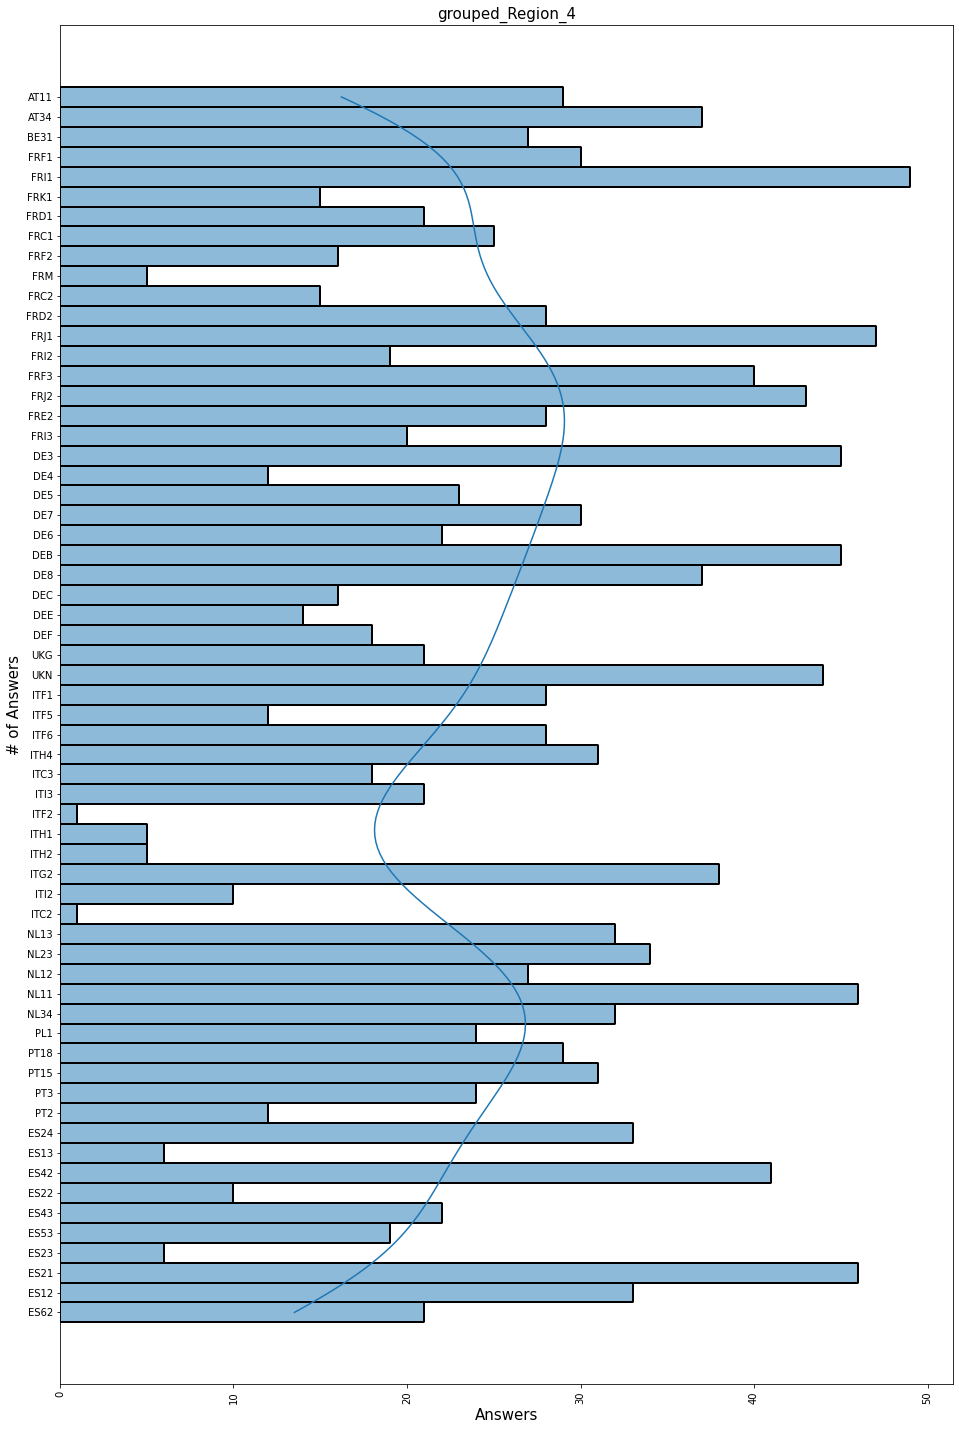

In [ ]:
var = 'grouped_Region_4'
fig, ax = plt.subplots(figsize=(16, 25))
plt.xticks(rotation='90')
filter = df[var].value_counts() < 50
filter = filter[filter]
s = df.loc[df[var].isin(filter.index)]
s = s.sort_values(by=['Country', 'Region'])
s['Region'] = s['Country'] + ', ' + s['Region']
sns.histplot(s, y=var, kde=True)
plt.xlabel('Answers', fontsize=15)
plt.ylabel('# of Answers', fontsize=15)
plt.title(var, fontsize=15)

In [ ]:
len(s[var].unique())

62

Let's see the distribution of the similarity index

In [ ]:
cp_df = answers_distribution(var)
cp_df

,BE23,FRG,CZ06,SE11,PL6,BE25,HU31,SE23,FR1,BE24,PL9,DE8,ES51,DK03,ITH3,FI1B,BE32,ITH4,CZ01,CZ07,NL41,BE1,RO41,CZ02,PL7,CZ05,DE2,DK01,ITH5,ES3,FRC2,FI19,NL31,RO31,HU32,BE21,CZ03,DK04,HU22,PT17,...,HU21,ES41,BE33,NL21,BE35,FRB,FRJ1,ITF6,ES22,UKC,ITH1,SE31,ES7,FRF2,ES53,ES12,FRF3,PT2,ITI2,BE34,FRK1,FRJ2,FRD1,ES24,FRI2,ES43,FRI3,ES13,BE31,PL1,ES62,FRM,ES23,ITH2,PT18,ITC2,ITF2,PT15,MT,CY
#,133.000000,57.000000,138.000000,228.000000,153.000000,107.000000,130.000000,202.000000,185.000000,96.000000,148.000000,37.000000,159.000000,228.000000,65.000000,267.000000,120.000000,31.000000,121.000000,125.000000,151.000000,105.000000,107.000000,127.000000,56.000000,131.000000,154.000000,325.000000,88.000000,138.000000,15.000000,279.000000,74.000000,130.000000,114.000000,161.000000,104.000000,224.000000,108.000000,306.000000,...,98.000000,59.000000,98.000000,56.000000,51.000000,52.000000,47.000000,28.000000,10.00000,50.000000,5.000000,66.000000,54.000000,16.00000,19.000000,33.000000,40.000000,12.000000,10.000000,526.000000,15.000000,43.000000,21.000000,33.000000,19.000000,22.000000,20.000000,6.000000,27.000000,24.000000,21.000000,5.000000,6.000000,5.000000,29.000000,1.000000,1.000000,31.000000,500.000000,500.000000
corr,7.405904,9.243833,6.280892,4.081582,2.446352,7.490511,2.570608,4.167261,3.387293,4.702998,3.237868,6.208039,5.653884,7.962278,9.394224,2.828892,6.705611,7.600584,3.368368,6.339109,4.678385,6.784976,4.970548,5.356432,4.848288,4.244453,2.344749,6.425166,9.469982,5.749591,5.852283,4.245633,4.648554,4.406584,2.685772,5.843871,5.157058,6.395862,3.210549,4.917552,...,3.507691,5.401601,7.544551,4.653395,5.714465,4.260044,6.465937,10.534164,4.45405,6.530602,9.610975,6.655106,7.494089,3.29299,6.847110,6.846218,8.181576,7.206822,10.276264,6.251503,5.765416,8.495838,3.554899,8.936499,8.019466,7.289926,6.727307,37.764831,8.707024,7.827998,9.117826,10.896448,16.456806,16.876527,6.904631,91.960158,69.772599,6.069115,2.411138,5.038476
Maybe yes maybe not,41.353383,36.842105,37.681159,32.894737,31.372549,32.710280,23.846154,34.653465,30.810811,40.625000,27.027027,35.135135,32.704403,27.192982,23.076923,24.344569,36.666667,22.580645,37.190083,36.000000,36.423841,38.095238,25.233645,36.220472,33.928571,32.824427,27.922078,27.384615,23.863636,38.405797,46.666667,24.372760,33.783784,23.846154,36.842105,34.161491,35.576923,28.125000,29.629630,31.372549,...,29.591837,45.762712,30.612245,41.071429,29.411765,25.000000,34.042553,25.000000,50.00000,20.000000,20.000000,34.848485,42.592593,31.25000,47.368421,45.454545,22.500000,41.666667,30.000000,35.171103,20.000000,48.837209,38.095238,27.272727,52.631579,22.727273,25.000000,16.666667,40.740741,37.500000,42.857143,20.000000,66.666667,NaN,31.034483,NaN,100.000000,25.806452,29.400000,34.000000
Probably not,29.323308,21.052632,23.913043,19.736842,19.607843,30.841121,19.230769,23.762376,16.756757,22.916667,15.540541,13.513514,13.836478,32.456140,10.769231,23.220974,17.500000,19.354839,21.487603,20.000000,19.205298,18.095238,11.214953,24.409449,14.285714,25.954198,20.779221,25.846154,10.227273,14.492754,20.000000,32.258065,16.216216,16.153846,19.298246,30.434783,23.076923,26.339286,21.296296,14.705882,...,12.244898,10.169492,20.408163,21.428571,31.372549,19.230769,10.638298,7.142857,20.00000,34.000000,20.000000,16.666667,5.555556,18.75000,15.789474,18.181818,35.000000,16.666667,10.000000,31.368821,20.000000,20.930233,19.047619,3.030303,15.789474,9.090909,30.000000,NaN,29.629630,29.166667,NaN,40.000000,NaN,40.000000,10.344828,NaN,NaN,12.903226,16.200000,11.800000
Probably yes,10.526316,7.017544,10.144928,14.035088,18.300654,7.476636,20.769231,11.386139,15.135135,15.625000,20.945946,35.135135,35.849057,7.894737,35.384615,20.599251,8.333333,38.709677,13.223140,8.800000,11.920530,11.428571,33.644860,10.236220,12.500000,16.793893,20.779221,10.461538,40.909091,30.434783,13.333333,17.921147,18.918919,25.384615,22.807018,9.316770,10.576923,10.714286,12.962963,34.313725,...,28.571429,22.033898,6.122449,16.071429,15.686

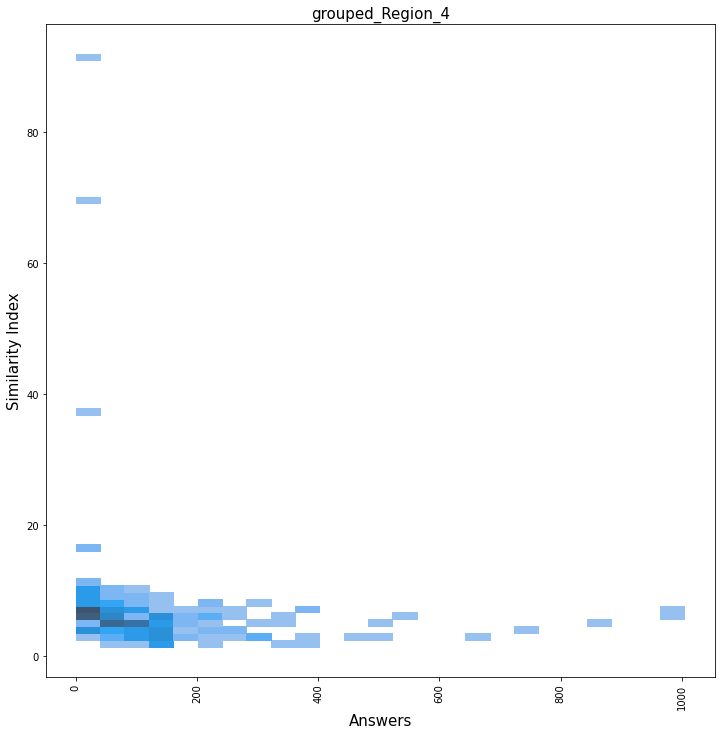

In [ ]:
plot_answers_similarity(var)

As you can see there are still some regions to be grouped

Let's only use 3 significant figures instead of 4

In [ ]:
df['grouped_Region_3'] = df_merge_rg['GEO'].map(lambda x: x[0:3])
df['grouped_Region_3']

0        BE2
1        FRG
2        CZ0
3        SE1
4        PL6
        ... 
26600     CY
26601     CY
26602     CY
26603     CY
26604     CY
Name: grouped_Region_3, Length: 26605, dtype: object

In [ ]:
len(df['grouped_Region_3'].unique())

102

We have now effectively halved the number of regions to 100 (wow such numbers)

Text(0.5, 1.0, 'grouped_Region_3')

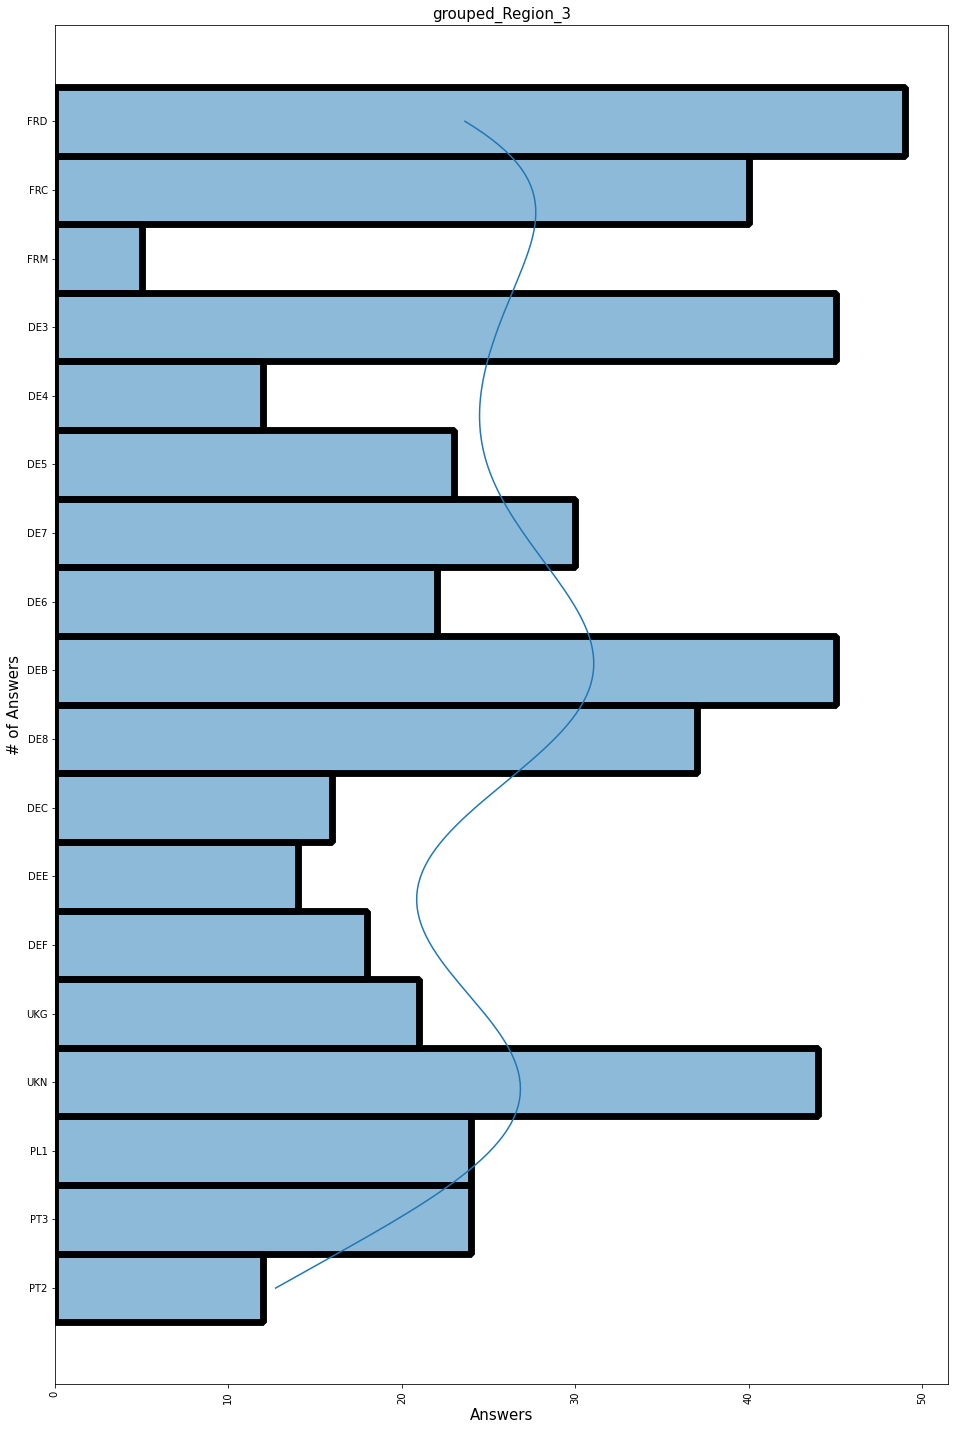

In [ ]:
var = 'grouped_Region_3'
fig, ax = plt.subplots(figsize=(16, 25))
plt.xticks(rotation='90')
filter = df[var].value_counts() < 50
filter = filter[filter]
s = df.loc[df[var].isin(filter.index)]
s = s.sort_values(by=['Country', 'Region'])
s['Region'] = s['Country'] + ', ' + s['Region']
sns.histplot(s, y=var, kde=True)
plt.xlabel('Answers', fontsize=15)
plt.ylabel('# of Answers', fontsize=15)
plt.title(var, fontsize=15)

In [ ]:
len(s[var].unique())

18

Now we really have a few Macro Regions with not a lot of answers, so we can use this data more accurately. Finally!

In [ ]:
var = "grouped_Region_3"
cp_df = answers_distribution(var)
cp_df

,BE2,FRG,CZ0,SE1,PL6,HU3,SE2,FR1,PL9,DE8,ES5,DK0,ITH,FI1,BE3,NL4,BE1,RO4,PL7,DE2,ES3,FRC,NL3,RO3,HU2,PT1,LT0,IE0,EL3,DE7,EL5,UKI,EE0,SI0,LV0,ES6,HR0,AT1,FRI,FRL,...,RO1,UKM,SE3,UKK,BG4,AT2,FRD,FRE,ES2,PL4,NL1,PL5,DEC,DEE,DE3,DE4,DEB,UKF,DE6,ITI,UKN,UKH,UKG,UKD,DEG,DED,DEF,FRF,ES4,PT3,PL2,FRB,FRJ,UKC,ES7,PT2,PL1,FRM,MT,CY
#,578.000000,57.000000,1000.000000,383.000000,153.000000,383.000000,442.000000,185.000000,148.000000,37.000000,296.000000,1010.000000,372.000000,1005.000000,822.000000,216.000000,105.000000,202.000000,56.000000,154.000000,138.000000,40.00000,468.000000,244.000000,307.000000,978.000000,1000.000000,1046.000000,394.000000,30.000000,303.000000,129.000000,1005.000000,841.000000,1000.000000,200.000000,1162.000000,432.000000,88.000000,73.000000,...,259.000000,68.000000,179.000000,81.000000,494.000000,214.000000,49.000000,93.000000,95.000000,153.000000,105.000000,102.000000,16.00000,14.000000,45.000000,12.000000,45.000000,93.000000,22.000000,194.000000,44.000000,97.000000,21.000000,111.000000,71.000000,84.000000,18.000000,86.000000,122.000000,24.000000,209.000000,52.000000,90.000000,50.000000,54.000000,12.000000,24.000000,5.000000,500.000000,500.000000
corr,5.790707,9.243833,4.572443,3.388279,2.446352,0.635137,4.178461,3.387293,3.237868,6.208039,5.550479,7.150223,5.075228,3.832488,5.621490,5.378450,6.784976,4.724670,4.848288,2.344749,5.749591,6.60778,4.725554,3.927392,1.843481,6.380455,4.211138,3.207064,7.491013,4.385558,8.031295,3.251744,6.379766,2.429185,6.748243,5.985091,4.275395,5.366446,5.588862,6.302262,...,2.544393,4.838376,6.156436,3.198368,4.196323,6.259083,7.737357,5.791632,3.656020,4.243285,6.938068,5.370544,3.61594,10.431229,6.360821,10.265364,7.172002,4.961622,4.609979,6.466190,6.573753,3.102626,5.559821,5.009727,3.005842,1.345642,4.376927,5.565297,4.387431,5.824156,2.428631,4.260044,5.496669,6.530602,7.494089,7.206822,7.827998,10.896448,2.411138,5.038476
Maybe yes maybe not,35.813149,36.842105,35.000000,33.681462,31.372549,30.548303,31.674208,30.810811,27.027027,35.135135,32.770270,26.633663,26.612903,25.771144,34.671533,38.425926,38.095238,20.792079,33.928571,27.922078,38.405797,50.00000,36.111111,23.770492,30.293160,32.413088,22.100000,36.137667,30.710660,36.666667,35.973597,27.906977,28.955224,31.629013,20.000000,35.000000,33.476764,20.370370,37.500000,34.246575,...,27.027027,38.235294,29.050279,32.098765,25.101215,21.028037,42.857143,31.182796,35.789474,22.875817,44.761905,25.490196,25.00000,14.285714,24.444444,16.666667,20.000000,43.010753,22.727273,30.412371,22.727273,39.175258,42.857143,40.540541,29.577465,26.190476,27.777778,25.581395,36.885246,41.666667,32.535885,25.000000,41.111111,20.000000,42.592593,41.666667,37.500000,20.000000,29.400000,34.000000
Probably not,28.892734,21.052632,22.800000,21.932115,19.607843,19.843342,27.149321,16.756757,15.540541,13.513514,13.513514,28.019802,14.784946,27.960199,27.980535,17.592593,18.095238,17.326733,14.285714,20.779221,14.492754,17.50000,19.658120,16.803279,15.309446,12.065440,16.300000,22.657744,10.152284,16.666667,6.600660,16.279070,35.621891,22.711058,20.400000,11.500000,17.125645,18.055556,23.863636,15.068493,...,15.830116,14.705882,26.256983,24.691358,21.255061,21.495327,14.285714,16.129032,11.578947,18.954248,24.761905,29.411765,18.75000,28.571429,6.666667,NaN,13.333333,20.430108,13.636364,9.793814,36.363636,19.587629,19.047619,20.720721,22.535211,21.428571,16.666667,25.581395,13.934426,12.500000,19.138756,19.230769,15.555556,34.000000,5.555556,16.666667,29.166667,40.000000,16.200000,11.800000
Don't know/no answer,10.899654,28.070175,10.000000,12.532637,12.418301,6.527415,11.312217,14.594595,13.513514,NaN,6.756757,13.366337,7.258065,9.452736,7.299270,15.277778,16.190476,5.940594,14.285714,3.896104,2.898551,7.50000,13.247863,14.754098,7.166124,4.396728,7.200000,4.302103,3.553299,3.333333,4.290429,10.852713,5.572139,4.161712,9.300000,5.000000,3.786575,5.092593,13.636364,21.917808,...,11.196911,13.235294,15.083799,9.876543,4.251012,2.336449,14.285714,

**\#** is the number of people who are from that region (so, who answered that region to the question "Region")

**corr** is the similarity index

Text(0.5, 1.0, 'grouped_Region_3')

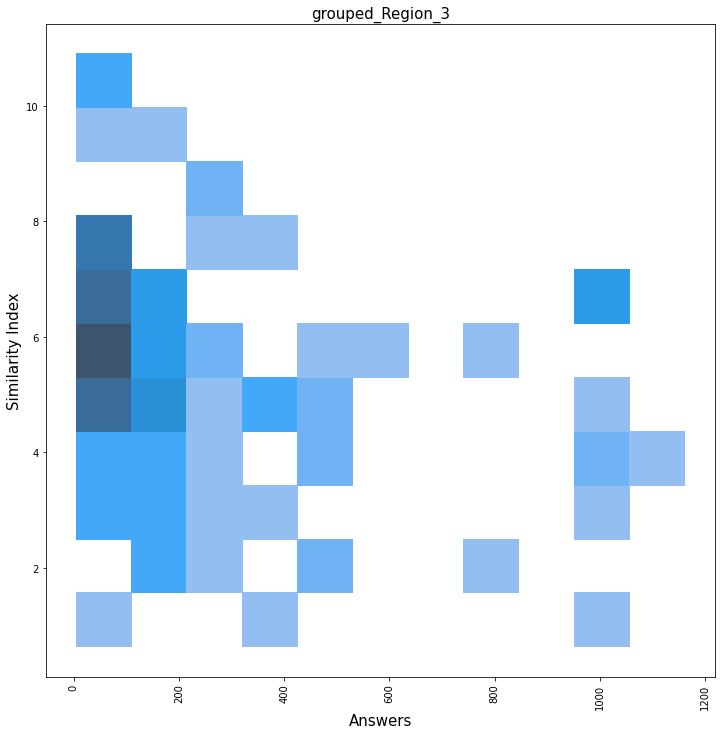

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.xticks(rotation='90')
s = cp_df.transpose()
# s = s.sort_values(by=['Country', 'Region'])
# s['Region'] = s['Country'] + ', ' + s['Region']
sns.histplot(y=s['corr'], x=s['#'])
plt.xlabel('Answers', fontsize=15)
plt.ylabel('Similarity Index', fontsize=15)
plt.title(var, fontsize=15)

##### Regional Statistics

now let's try to group them by the statistic we mentioned above, and that is in the dataset

In [ ]:
# import dataset
ds_path = "/content/drive/MyDrive/MIDA2/IntelligentMobilityProject/Survey+dataset/macro_regions_per_country/regional_grouping.csv"

rg_df = pd.read_csv(ds_path) # region groups
rg_df

,TIME,GEO,GEO_LABEL,INDIC_IS,UNIT,Value,Flag and Footnotes
0,2015,BE,Belgium,Frequency of internet access: daily,Percentage of individuals,73,NaN
1,2015,BE1,Région de Bruxelles-Capitale/Brussels Hoofdste...,Frequency of internet access: daily,Percentage of individuals,73,NaN
2,2015,BE10,Région de Bruxelles-Capitale/Brussels Hoofdste...,Frequency of internet access: daily,Percentage of individuals,73,NaN
3,2015,BE2,Vlaams Gewest,Frequency of internet access: daily,Percentage of individuals,75,NaN
4,2015,BE21,Prov. Antwerpen,Frequency of internet access: daily,Percentage of individuals,73,NaN
...,...,...,...,...,...,...,...
1800,2019,TRA,Kuzeydogu Anadolu,Frequency of internet access: daily,Percentage of individuals,50,NaN
1801,2019,TRB,Ortadogu Anadolu,Frequency of internet access: daily,Percentage of individuals,52,NaN
1802,2019,TRC,Güneydogu Anadolu,Frequency of internet access: daily,Percentage of individuals,45,NaN
1803,2019,BA,Bosnia and Herzegovina,Frequency of internet access: daily,Percentage of individuals,65,NaN


In [ ]:
rg_df = rg_df.loc[rg_df['TIME'] == 2015, ['GEO', 'Value']]
rg_df['InternetUsers'] = rg_df['Value']
rg_df.pop('Value')
rg_df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360
GEO,BE,BE1,BE10,BE2,BE21,BE22,BE23,BE24,BE25,BE3,BE31,BE32,BE33,BE34,BE35,BG,BG3,BG31,BG32,BG33,BG34,BG4,BG41,BG42,CZ,CZ0,CZ01,CZ02,CZ03,CZ04,CZ05,CZ06,CZ07,CZ08,DK,DK0,DK01,DK02,DK03,DK04,...,UK,UKC,UKD,UKE,UKF,UKG,UKH,UKI,UKJ,UKK,UKL,UKM,UKN,ME,MK,MK0,MK00,AL,RS,RS1,RS11,RS12,RS2,RS21,RS22,TR,TR1,TR2,TR3,TR4,TR5,TR6,TR7,TR8,TR9,TRA,TRB,TRC,BA,XK
InternetUsers,73,73,73,75,73,75,75,79,72,71,80,71,68,71,71,46,42,33,46,43,44,51,58,41,63,63,81,64,64,50,62,61,59,61,87,87,89,85,87,88,...,83,69,74,84,88,74,89,85,88,81,78,79,82,:,60,60,60,:,55,:,:,:,:,:,:,40,53,43,43,44,45,36,35,31,38,17,24,25,:,:


In [ ]:

for row in rg_df.loc[rg_df['InternetUsers'].astype(str).str.isdigit()].transpose():
  print(rg_df.transpose()[row])

GEO              BE
InternetUsers    73
Name: 0, dtype: object
GEO              BE1
InternetUsers     73
Name: 1, dtype: object
GEO              BE10
InternetUsers      73
Name: 2, dtype: object
GEO              BE2
InternetUsers     75
Name: 3, dtype: object
GEO              BE21
InternetUsers      73
Name: 4, dtype: object
GEO              BE22
InternetUsers      75
Name: 5, dtype: object
GEO              BE23
InternetUsers      75
Name: 6, dtype: object
GEO              BE24
InternetUsers      79
Name: 7, dtype: object
GEO              BE25
InternetUsers      72
Name: 8, dtype: object
GEO              BE3
InternetUsers     71
Name: 9, dtype: object
GEO              BE31
InternetUsers      80
Name: 10, dtype: object
GEO              BE32
InternetUsers      71
Name: 11, dtype: object
GEO              BE33
InternetUsers      68
Name: 12, dtype: object
GEO              BE34
InternetUsers      71
Name: 13, dtype: object
GEO              BE35
InternetUsers      71
Name: 14, dtype: object


In [ ]:
rg_df.loc[~rg_df['InternetUsers'].astype(str).str.isdigit()].transpose()

,63,64,65,69,70,182,183,190,191,223,224,225,227,228,230,231,232,233,241,242,243,271,273,286,287,300,301,302,312,313,314,315,316,317,318,319,320,334,338,340,341,342,343,344,345,359,360
GEO,IE04,IE05,IE06,EL1,EL2,LT01,LT02,HU11,HU12,AT11,AT12,AT13,AT21,AT22,AT31,AT32,AT33,AT34,PL7,PL8,PL9,SI01,SI02,FI2,FI20,IS,IS0,IS00,CH,CH0,CH01,CH02,CH03,CH04,CH05,CH06,CH07,ME,AL,RS1,RS11,RS12,RS2,RS21,RS22,BA,XK
InternetUsers,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:


let's try to merge

In [ ]:
df_merge = df[['grouped_Region_3']].copy()
df_merge_rg = df_merge.merge(rg_df, 
                                 how='left', 
                                 left_on='grouped_Region_3', 
                                 right_on='GEO'
                                 )
df_merge_rg = df_merge_rg[['grouped_Region_3', 'InternetUsers']]
df_merge_rg

,grouped_Region_3,InternetUsers
0,BE2,75
1,FRG,71
2,CZ0,63
3,SE1,85
4,PL6,50
...,...,...
26600,CY,63
26601,CY,63
26602,CY,63
26603,CY,63


In [ ]:
df_merge_rg.loc[~df_merge_rg['InternetUsers'].astype(str).str.isdigit()]['grouped_Region_3'].value_counts()

PL9    148
PL7     56
Name: grouped_Region_3, dtype: int64

only PL9 and PL7 have to be corrected!
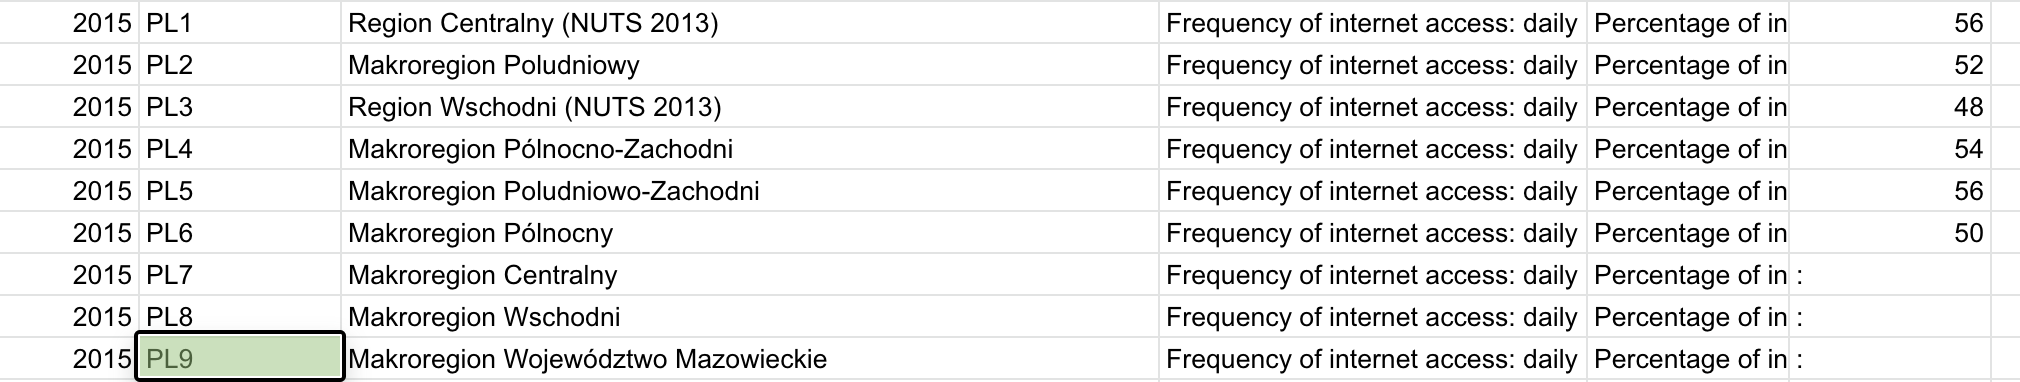

PL7 is PL1, 
PL9 is PL1 as well, source [here](https://en.wikipedia.org/wiki/NUTS_statistical_regions_of_Poland#Former_coding)

In [ ]:
rg_df.loc[rg_df['GEO'].isin(['PL7', 'PL9']), ['InternetUsers']] = \
  rg_df.loc[rg_df['GEO']=='PL1']['InternetUsers'].values[0]

In [ ]:
rg_df.loc[rg_df['GEO'].isin(['PL7', 'PL9'])]

,GEO,InternetUsers
241,PL7,56
243,PL9,56


run merge again

In [ ]:
df_merge = df[['grouped_Region_3']].copy()
df_merge_rg = df_merge.merge(rg_df, 
                                 how='left', 
                                 left_on='grouped_Region_3', 
                                 right_on='GEO'
                                 )
df_merge_rg = df_merge_rg[['grouped_Region_3', 'InternetUsers']]
df_merge_rg

,grouped_Region_3,InternetUsers
0,BE2,75
1,FRG,71
2,CZ0,63
3,SE1,85
4,PL6,50
...,...,...
26600,CY,63
26601,CY,63
26602,CY,63
26603,CY,63


check that all is good

In [ ]:
df_merge_rg.loc[~df_merge_rg['InternetUsers'].astype(str).str.isdigit()]['grouped_Region_3'].value_counts()

Series([], Name: grouped_Region_3, dtype: int64)

all good. save result.

In [ ]:
df['InternetUsers'] = df_merge_rg['InternetUsers']

##### Internet Users Grouped


this means using the official grouping intervals on the dataset

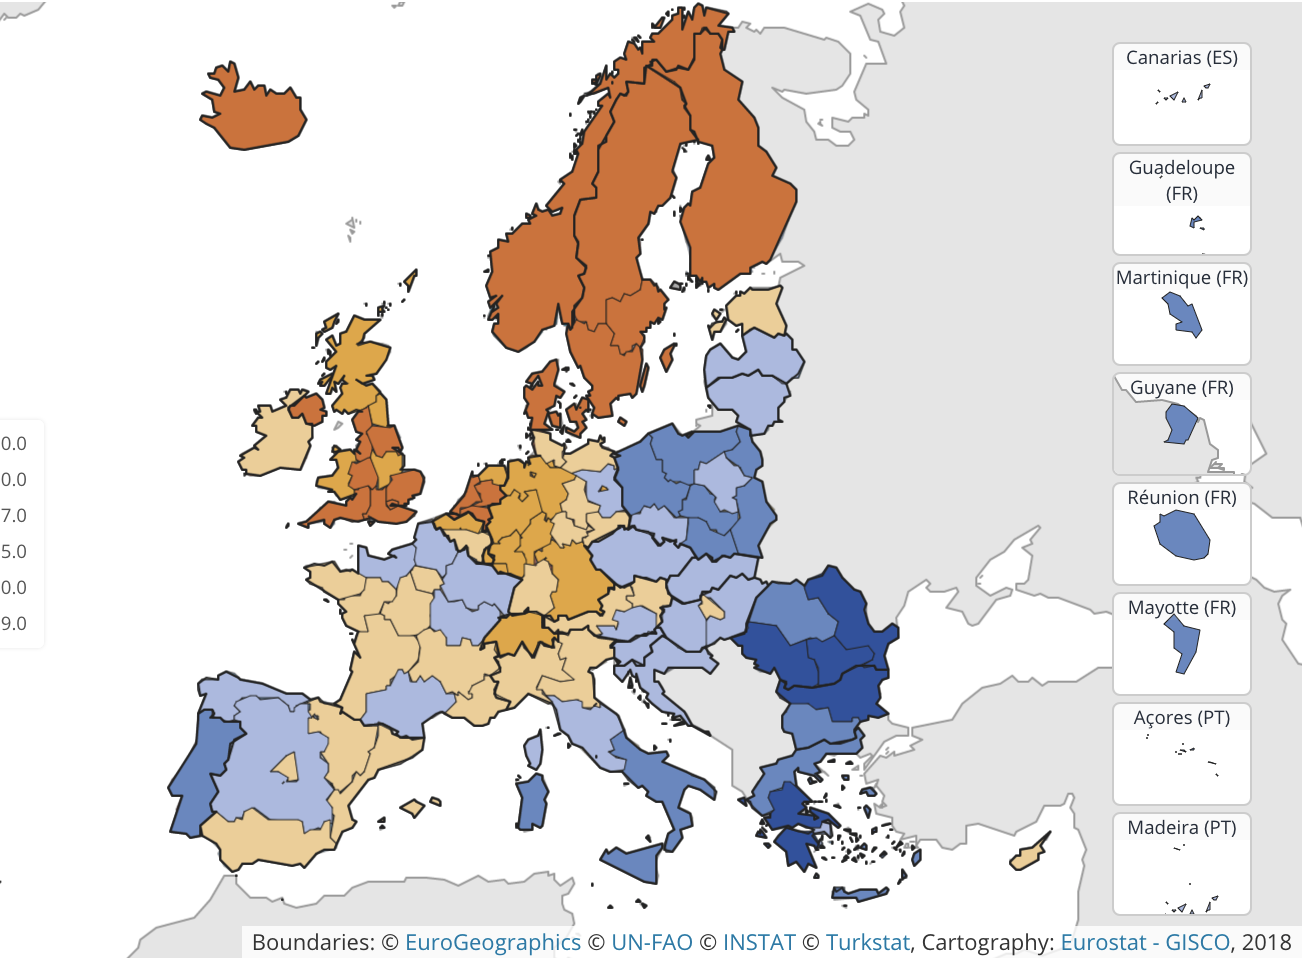

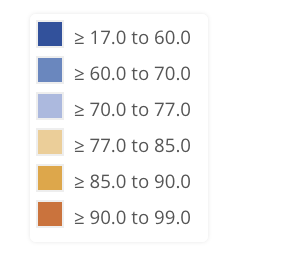

In [ ]:
df['grouped_InternetUsers'] = df['InternetUsers'].copy()

In [ ]:
users_grouping = {
    '17': '≥ 17.0 to 60.0',
    '60': '≥ 60.0 to 70.0',
    '70': '≥ 70.0 to 77.0',
    '77': '≥ 77.0 to 85.0',
    '85': '≥ 85.0 to 90.0',
    '90': '≥ 90.0 to 99.0'
}
last_num = '99'
for (group_num, group_text) in sorted(users_grouping.items(), reverse=True):
  df.loc[(group_num<=df['InternetUsers'])&(df['InternetUsers']<last_num), ['grouped_InternetUsers']] = group_text
  last_num = group_num

In [ ]:
df.loc[df['InternetUsers']!='', ['grouped_InternetUsers', 'InternetUsers']]

,grouped_InternetUsers,InternetUsers
0,≥ 70.0 to 77.0,75
1,≥ 70.0 to 77.0,71
2,≥ 60.0 to 70.0,63
3,≥ 85.0 to 90.0,85
4,≥ 17.0 to 60.0,50
...,...,...
26600,≥ 60.0 to 70.0,63
26601,≥ 60.0 to 70.0,63
26602,≥ 60.0 to 70.0,63
26603,≥ 60.0 to 70.0,63


In [ ]:
cp_df = answers_distribution('InternetUsers')
cp_df

,75,71,63,85,50,57,81,74,56,65,67,87,84,73,35,79,43,64,62,80,52,77,61,66,60,72,68,47,42,31,69,55,54,83,48,88,78,76,38,51,82,89,70
#,578.000000,1347.000000,1584.000000,1196.000000,153.000000,383.000000,695.000000,442.000000,2415.000000,231.000000,2159.000000,1221.000000,1081.000000,105.000000,202.000000,222.000000,244.000000,636.000000,487.000000,113.000000,512.000000,1005.000000,1163.000000,1547.000000,2162.000000,432.000000,235.000000,209.000000,506.000000,136.000000,171.000000,218.000000,387.000000,23.000000,155.000000,226.000000,246.000000,284.000000,259.000000,523.000000,44.000000,97.000000,571.000000
corr,5.790707,2.446822,1.962345,3.242023,2.446352,0.635137,3.322675,1.859492,2.824176,6.158251,2.925032,6.349062,3.444450,6.784976,4.724670,1.454907,3.927392,2.444539,5.259560,4.145660,4.188216,6.379766,2.534245,4.076887,1.982624,5.366446,4.648329,7.069620,2.238175,6.244910,4.565470,7.911696,5.060530,6.020934,4.572994,4.113927,5.369923,4.417698,2.544393,3.962543,6.573753,3.102626,2.131512
Maybe yes maybe not,35.813149,32.590943,34.217172,34.866221,31.372549,30.548303,32.661871,32.579186,27.950311,31.168831,32.700324,28.501229,27.289547,38.095238,20.792079,31.081081,23.770492,28.930818,30.800821,23.893805,34.570312,28.955224,32.760103,22.818358,32.516189,20.370370,33.191489,33.014354,26.086957,20.588235,32.748538,31.192661,25.581395,21.739130,38.064516,39.380531,29.268293,23.239437,27.027027,25.812620,22.727273,39.175258,29.422067
Probably not,28.892734,23.236823,19.255051,19.648829,19.607843,19.843342,25.179856,17.647059,15.031056,10.389610,17.832330,27.272727,27.382054,18.095238,17.326733,18.918919,16.803279,16.194969,11.293634,23.008850,11.718750,35.621891,19.862425,20.038785,18.640148,18.055556,23.829787,10.047847,22.924901,11.764706,25.146199,8.256881,12.144703,30.434783,13.548387,19.026549,24.390244,14.084507,15.830116,21.032505,36.363636,19.587629,16.987741
Don't know/no answer,10.899654,7.423905,9.406566,13.127090,12.418301,6.527415,10.359712,9.954751,6.832298,2.597403,5.974988,12.776413,9.528215,16.190476,5.940594,6.756757,14.754098,5.974843,6.160164,3.539823,7.617188,5.572139,4.385211,7.369101,6.891767,5.092593,14.468085,3.827751,7.905138,14.705882,14.035088,2.752294,10.077519,8.695652,12.258065,10.176991,14.634146,7.746479,11.196911,4.588910,11.363636,6.185567,5.429072
Probably yes,10.726644,17.297699,16.792929,14.966555,18.300654,21.932115,13.525180,19.230769,29.151139,32.900433,25.428439,10.073710,17.298797,11.428571,30.198020,20.270270,25.409836,27.201258,31.006160,28.318584,22.265625,10.646766,25.021496,19.974144,23.265495,28.703704,13.191489,26.315789,23.320158,33.088235,12.865497,32.110092,30.232558,13.043478,20.000000,15.044248,11.382114,31.690141,24.324324,29.254302,15.909091,15.463918,25.919440
Certainly not,9.861592,11.655531,10.479798,9.698997,11.764706,10.966057,8.345324,8.823529,9.896480,6.493506,5.372858,16.953317,11.378353,14.285714,12.871287,9.009009,7.786885,9.748428,4.722793,12.389381,6.054688,13.432836,6.104901,22.107304,6.475486,8.564815,10.638298,2.870813,7.509881,10.294118,8.771930,3.211009,7.235142,8.695652,11.612903,4.867257,15.040650,9.859155,9.652510,5.927342,4.545455,10.309278,10.858144
Certainly yes,3.806228,7.795100,9.848485,7.692308,6.535948,10.182768,9.928058,11.764706,11.138716,16.450216,12.691061,4.422604,7.123034,1.904762,12.871287,13.963964,11.475410,11.949686,16.016427,8.849558,17.773438,5.771144,11.865864,7.692308,12.210916,19.212963,4.680851,23.923445,12.252964,9.558824,6.432749,22.477064,14.728682,17.391304,4.516129,11.504425,5.284553,13.380282,11.969112,13.384321,9.090909,9.278351,11.383538


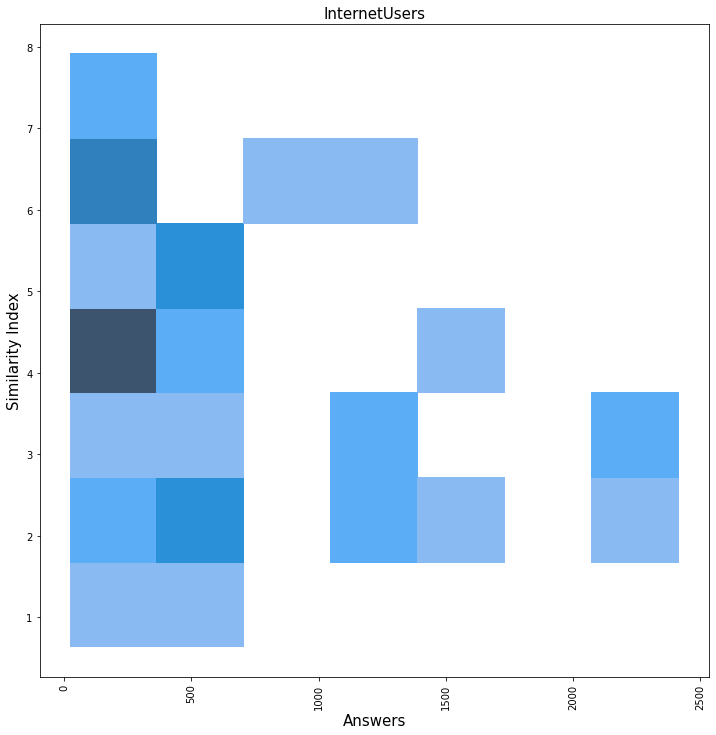

In [ ]:
plot_answers_similarity('InternetUsers')

In [ ]:
cp_df = answers_distribution('grouped_InternetUsers')
cp_df

,≥ 70.0 to 77.0,≥ 60.0 to 70.0,≥ 85.0 to 90.0,≥ 17.0 to 60.0,≥ 77.0 to 85.0
#,3759.000000,10375.000000,2740.000000,6302.000000,3429.000000
corr,0.693722,1.040512,4.133756,2.654565,3.523999
Maybe yes maybe not,30.646449,31.084337,32.554745,28.197398,29.046369
Probably not,21.069433,18.457831,22.992701,15.788639,28.579761
Probably yes,20.058526,22.853012,12.810219,27.054903,14.669000
Certainly not,10.508114,9.397590,12.554745,8.600444,11.402741
Certainly yes,9.763235,11.228916,6.605839,12.726119,7.757364
Don't know/no answer,7.954243,6.978313,12.481752,7.632498,8.544765


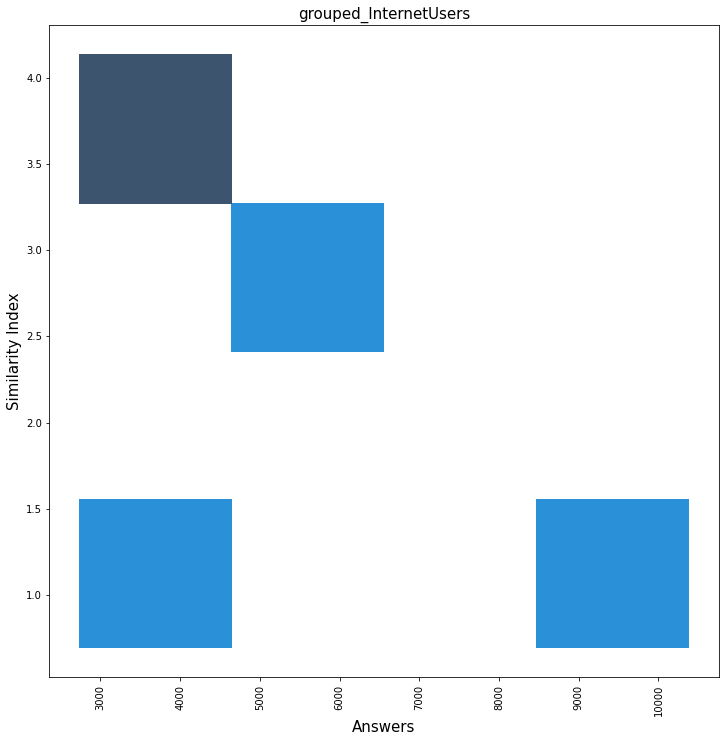

In [ ]:
plot_answers_similarity('grouped_InternetUsers')

#### Number_vehicles_in_household

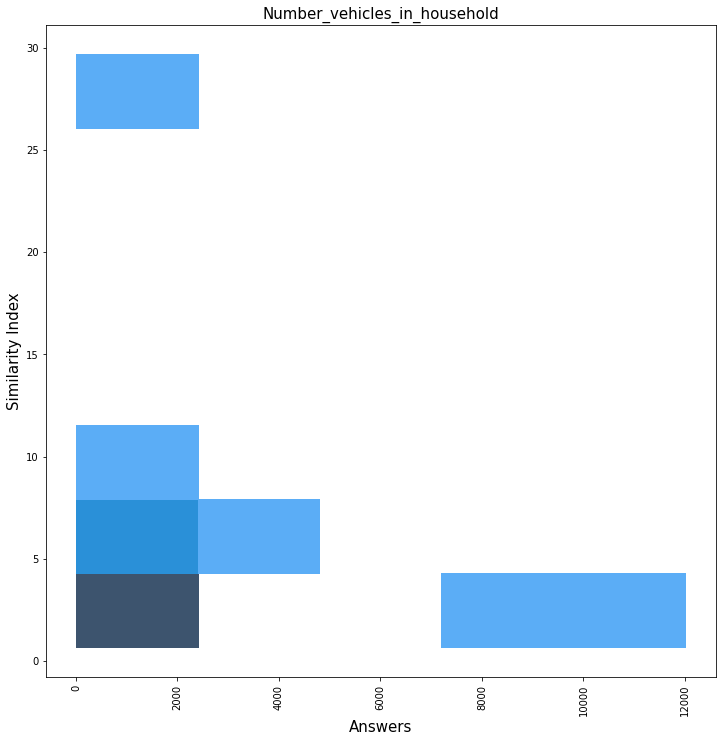

In [ ]:
var = 'Number_vehicles_in_household'
plot_answers_similarity(var)

definitely skewed, fix it by grouping

In [ ]:
cp_df = answers_distribution(var)
cp_df.sort_index(axis=1)

,0,1,2,3,4,5,6,7,8,9,10
#,3358.000000,12003.000000,8118.000000,2187.000000,582.000000,196.000000,74.000000,29.000000,24.000000,8.000000,26.000000
corr,5.339656,0.663879,1.278456,1.722710,1.358268,2.955540,4.010084,4.679727,9.472635,29.659838,5.903941
Maybe yes maybe not,22.126266,31.042239,32.421779,30.818473,28.694158,27.551020,28.378378,34.482759,12.500000,62.500000,26.923077
Probably not,13.758189,21.011414,20.078837,22.405121,22.164948,26.020408,18.918919,24.137931,20.833333,NaN,7.692308
Probably yes,19.654556,20.761476,22.530180,23.502515,21.477663,19.897959,14.864865,17.241379,16.666667,NaN,19.230769
Certainly not,11.554497,10.080813,9.066272,9.190672,11.512027,9.183673,10.810811,17.241379,37.500000,NaN,19.230769
Certainly yes,12.030971,9.680913,10.815472,10.196616,10.652921,13.265306,21.621622,6.896552,8.333333,37.500000,11.538462
Don't know/no answer,20.875521,7.423144,5.087460,3.886603,5.498282,4.081633,5.405405,NaN,4.166667,NaN,15.384615


from 5 to 10 they have less answers (357) than 4 alone, so let's group them

In [ ]:
df.loc[df[var] >= 5, 'grouped_'+var] = '>=5'
df.loc[df[var] < 5, 'grouped_'+var] = df.loc[df[var] < 5, var]

In [ ]:
df.loc[df[var] >= 5, 'grouped_'+var]

164      >=5
175      >=5
206      >=5
218      >=5
314      >=5
        ... 
26558    >=5
26560    >=5
26568    >=5
26570    >=5
26571    >=5
Name: grouped_Number_vehicles_in_household, Length: 357, dtype: object

In [ ]:
df.loc[df[var] < 5, 'grouped_'+var]

0        1
1        3
2        1
3        1
4        1
        ..
26600    3
26601    2
26602    2
26603    1
26604    2
Name: grouped_Number_vehicles_in_household, Length: 26248, dtype: object

In [ ]:
target_vs_var = df.loc[df[var].notnull(), [target_variable, var]]
# a priori probability
target_series = target_vs_var[target_variable] \
  .value_counts(normalize=True) * 100

In [ ]:
target_series

Maybe yes maybe not     30.227401
Probably yes            21.364405
Probably not            19.966172
Certainly yes           10.452922
Certainly not            9.949258
Don't know/no answer     8.039842
Name: Considering_electric_or_hybrid_vehicle_next_purchase, dtype: float64

In [ ]:
df_corr = answers_distribution(f'grouped_{var}')
df_corr

,1,3,0,2,4,>=5
#,12003.000000,2187.000000,3358.000000,8118.000000,582.000000,357.000000
corr,0.663879,1.722710,5.339656,1.278456,1.358268,2.977123
Maybe yes maybe not,31.042239,30.818473,22.126266,32.421779,28.694158,28.011204
Probably not,21.011414,22.405121,13.758189,20.078837,22.164948,22.128852
Probably yes,20.761476,23.502515,19.654556,22.530180,21.477663,17.927171
Certainly not,10.080813,9.190672,11.554497,9.066272,11.512027,12.605042
Certainly yes,9.680913,10.196616,12.030971,10.815472,10.652921,14.565826
Don't know/no answer,7.423144,3.886603,20.875521,5.087460,5.498282,4.761905


In [ ]:
df_corr = pd.DataFrame({
    'Average T_q': target_series,
    f'Number of vehicles: 1 (s: {df_corr[1][1]:.2f})': df_corr[1][2:],
    f'Number of vehicles: 0 (s: {df_corr[0][1]:.2f})': df_corr[0][2:]
})
df_corr

,Average T_q,Number of vehicles: 1 (s: 0.66),Number of vehicles: 0 (s: 5.34)
Certainly not,9.949258,10.080813,11.554497
Certainly yes,10.452922,9.680913,12.030971
Don't know/no answer,8.039842,7.423144,20.875521
Maybe yes maybe not,30.227401,31.042239,22.126266
Probably not,19.966172,21.011414,13.758189
Probably yes,21.364405,20.761476,19.654556


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plotClustersRadar(df, save_path=None, max_len_theta_labels=13, row_height=300):
  titles = [f"{i}" for i in df.columns]
  cols = len(df.columns)
  rows = 1
  fig = make_subplots(rows=rows, cols=cols,
                      specs=[[{'type': 'polar'}]*cols]*rows,
                      horizontal_spacing=0.5/cols,
                      vertical_spacing=0.3/rows,
                      subplot_titles=titles,
                      )
  max = 0
  for column in df.columns:
    if df[column].max() > max:
      max = df[column].max()
  polar_args = {}
  for i in range(rows):
    for j in range(cols):
      #print(f"i: {i+1}, j: {j+1}")
      if i*cols+j < len(df.columns):
        fig.add_trace(go.Scatterpolar(
                            r=df[df.columns[i*cols+j]],
                            theta=[x[:max_len_theta_labels] 
                                   for x in df.index],
                            fill='toself',
                            name=df.columns[i*cols+j]),
                        row=i+1, col=j+1
                      )
        polar_args[f"polar{i*cols+j+1}"] = dict(
                                              radialaxis=dict(
                                                visible=True,
                                                range=[0.0, max]
                                              )                                            )
  fig.update_layout(
      height=row_height*rows,
      showlegend=False,
      **polar_args
  )

  if save_path:
    fig.write_html(save_path)
  fig.show()

In [ ]:
plotClustersRadar(df_corr)

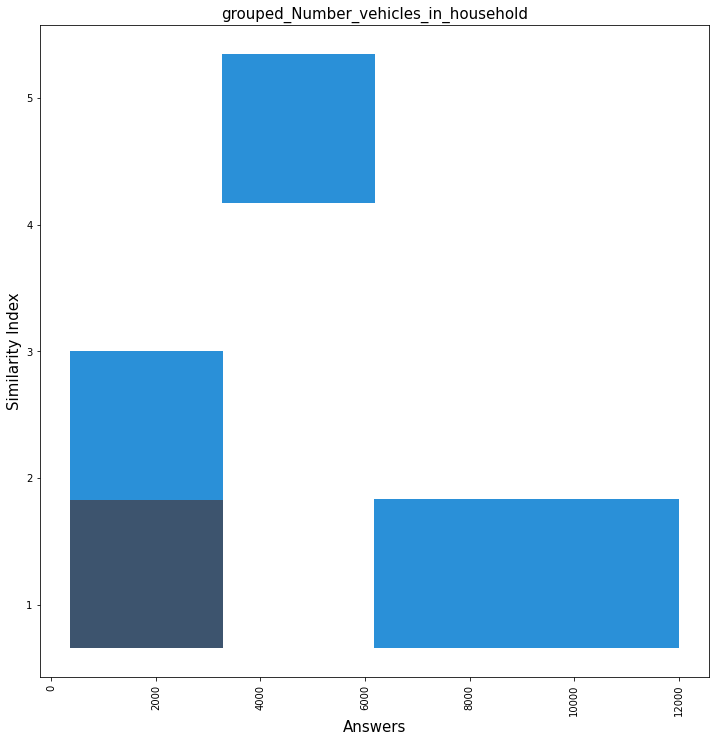

In [ ]:
plot_answers_similarity('grouped_'+var)

#### ? Transfers_between_modes_during_frequent_trip

In [ ]:
var = 'Transfers_between_modes_during_frequent_trip'
# plot_answers_similarity(var) # error: fill NaN values

#### Profession

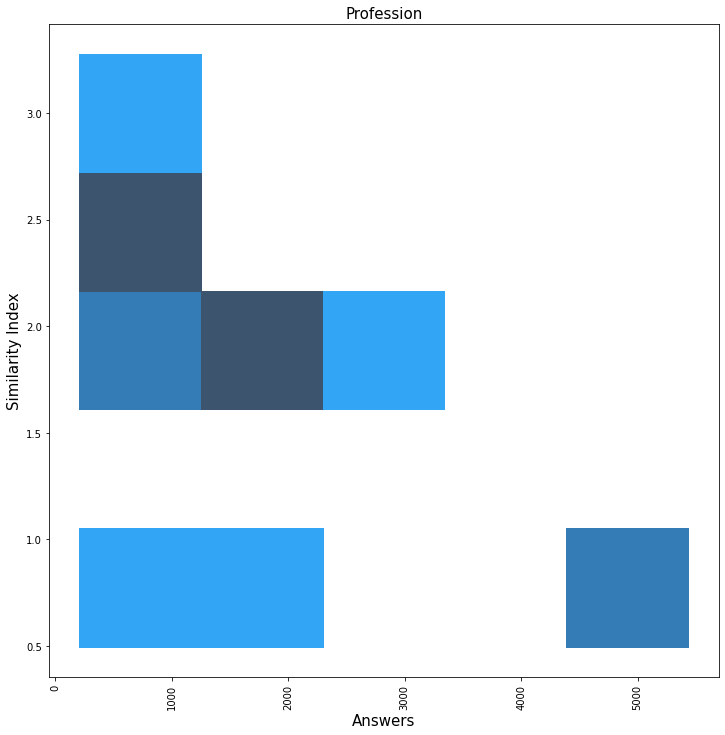

In [ ]:
var = 'Profession'
plot_answers_similarity(var)

not too skewed, just a little

#### Age

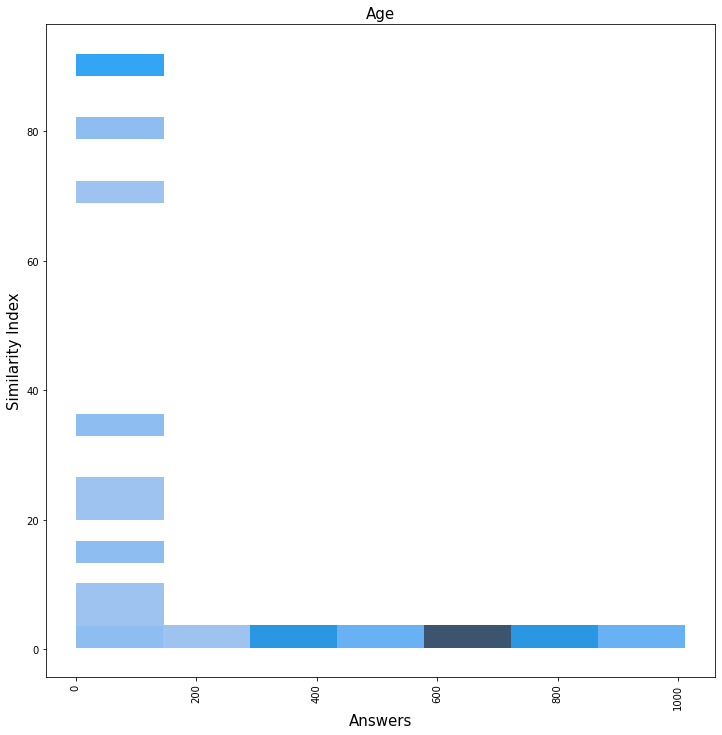

In [ ]:
var = 'Age'
plot_answers_similarity(var)

this is indeed a lot skewed, and shows how incredibly not important this variable is!
Let's group it..

In [ ]:
groups = 10
answers_per_group = len(df[var]) / groups

n_of_answers = 0  # growing
splitting_list = []
for i, answer in enumerate(np.sort(df[var].unique())):
  n_of_answers += df[var].value_counts()[answer]
  if n_of_answers >= len(splitting_list) * answers_per_group:
    splitting_list.append(answer)
    print(answer, n_of_answers)
splitting_list[-1] = max(df[var]) + 1

splitting_list

16 95
23 2671
27 5689
30 8142
35 11105
39 13520
43 15969
47 18772
51 22131
54 24508
84 26605


[16, 23, 27, 30, 35, 39, 43, 47, 51, 54, 85]

In [ ]:
for split in range(len(splitting_list[:-1])):
  print(f'{splitting_list[split]}:{splitting_list[split+1]}')
  df.loc[(splitting_list[split] <= df[var]) & (df[var] < splitting_list[split+1]), ["grouped_"+var]] = \
    f'{splitting_list[split]}:{splitting_list[split+1]}'

16:23
23:27
27:30
30:35
35:39
39:43
43:47
47:51
51:54
54:85


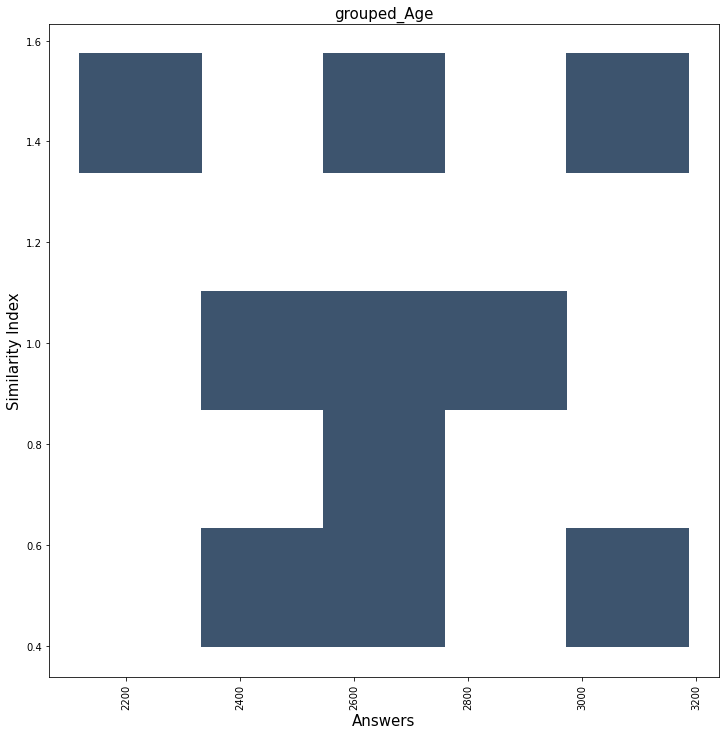

In [ ]:
plot_answers_similarity('grouped_'+var)

### Result

Now let's analyze the correlations for each answer, to find if people replying with a particular answer are influencing the results, so this time the more the correlation value is higher, the more the input variable has an influence on the target variable.

In [ ]:
# update input variables with new grouped ones
input_variables = list(df.columns[df.columns!=target_variable]) 
input_variables

['Country',
 'Gender',
 'Age',
 'Education',
 'Region',
 'Profession',
 'Work_status',
 'Household_members',
 'Income_level',
 'Location_of_resudence',
 'Centre_or_suburbs',
 'Public_transport_service',
 'Car_driving_license',
 'Number_vehicles_in_household',
 'Know_what_car_sharing_is',
 'Would_subsribe_car_sharing_if_available',
 'Most_frequent_trip_Walk',
 'Most_frequent_trip_Bicycle',
 'Most_frequent_trip_Car_as_Driver',
 'Most_frequent_trip_Car_as_Passenger',
 'Most_frequent_trip_Train',
 'Most_frequent_trip_Underground_or_light_train',
 'Most_frequent_trip_Tram',
 'Most_frequent_trip_Bus',
 'Most_frequent_trip_Motorcycle_or_moped',
 'Destination_most_frequent_trip',
 'Frequency_most_frequent_trip',
 'Problem_most_frequent_trip_Congestion',
 'Problem_most_frequent_trip_Parking',
 'Problem_most_frequent_trip_Lack_of_bicycle_lanes',
 'Problem_most_frequent_trip_Infrequent_public_transport',
 'Problem_most_frequent_trip_Lack_of_public_transport_coverage',
 'Problem_most_frequent_trip

In [ ]:
similarity_target_vs_input_df = pd.DataFrame()
corr_list = []
max_corr_answer_list = []
n_of_max_corr_answers_list = []
for var in input_variables:
  corr, max_corr_answer = similarity_target_vs_input(var)
  corr_list.append(corr)
  max_corr_answer_list.append(max_corr_answer)
  n_of_max_corr_answers_list.append(df[var].value_counts()[max_corr_answer])


In [ ]:
similarity_target_vs_input_df["var"] = input_variables
similarity_target_vs_input_df["corr"] = corr_list
similarity_target_vs_input_df["max_corr_answer"] = max_corr_answer_list
similarity_target_vs_input_df["#"] = n_of_max_corr_answers_list

similarity_target_vs_input_df.sort_values(by="corr", ascending=False)

,var,corr,max_corr_answer,#
4,Region,5.476531,Valle d'Aosta/Vallée d'Aoste,1
39,corrected_Region,5.086777,Valle d'Aosta/Vallée d'Aoste,1
40,grouped_Region_4,5.086777,ITC2,1
41,grouped_Region_3,4.774296,FRM,5
0,Country,4.544901,Italy,1000
15,Would_subsribe_car_sharing_if_available,4.323106,Don't know / No answer,1590
42,InternetUsers,3.505576,55,218
36,Concern_environmental_impacts,3.348858,1,556
37,Preference_tolls_or_traffic_limitation,2.404285,Definitely more acceptable to pay for less con...,1486
43,grouped_InternetUsers,2.012493,≥ 85.0 to 90.0,2740


In [ ]:
df.to_csv('/content/drive/MyDrive/MIDA2/IntelligentMobilityProject/Survey+dataset/2_grouped_values.csv', index=False)

#### Selection

In [ ]:
skewed_vars = [
          'Region', # all these regions are skewed
          'grouped_Region_4',
          'corrected_Region',
          'grouped_InternetUsers', # InternetUsers is better and more information rich
          'Frequent_trip_duration_in_minutes', # grouped_ is better (this is skewed)
          'Number_vehicles_in_household', # although this is not much different from grouped_
          'Age', # grouped_Age has way lower skewness
          'Problem_most_frequent_trip_none', # they have high missing ratio, not recoverable
          'Problem_most_frequent_trip_Parking',
          'Problem_most_frequent_trip_Congestion',
          'Problem_most_frequent_trip_Lack_of_bicycle_lanes',
          'Problem_most_frequent_trip_Infrequent_public_transport',
          'Problem_most_frequent_trip_Lack_of_public_transport_coverage',
          'Transfers_between_modes_during_frequent_trip', # same issue, 
              # very high missing ratio (but it was important as variable)
          
]

In [ ]:
similarity_target_vs_input_df.loc[~similarity_target_vs_input_df['var'].isin(skewed_vars)] \
  .sort_values(by="corr", ascending=False)

,var,corr,max_corr_answer,#
41,grouped_Region_3,4.774296,FRM,5
0,Country,4.544901,Italy,1000
15,Would_subsribe_car_sharing_if_available,4.323106,Don't know / No answer,1590
42,InternetUsers,3.505576,55,218
36,Concern_environmental_impacts,3.348858,1,556
37,Preference_tolls_or_traffic_limitation,2.404285,Definitely more acceptable to pay for less con...,1486
12,Car_driving_license,1.685789,No,4921
44,grouped_Number_vehicles_in_household,1.574836,0,3358
5,Profession,1.426657,company director/CEO,211
1,Gender,1.410378,Male,13164


In [ ]:
df_clean = df.transpose()[~df.keys().isin(skewed_vars)].transpose()
df_clean

,Country,Gender,Education,Profession,Work_status,Household_members,Income_level,Location_of_resudence,Centre_or_suburbs,Public_transport_service,Car_driving_license,Considering_electric_or_hybrid_vehicle_next_purchase,Know_what_car_sharing_is,Would_subsribe_car_sharing_if_available,Most_frequent_trip_Walk,Most_frequent_trip_Bicycle,Most_frequent_trip_Car_as_Driver,Most_frequent_trip_Car_as_Passenger,Most_frequent_trip_Train,Most_frequent_trip_Underground_or_light_train,Most_frequent_trip_Tram,Most_frequent_trip_Bus,Most_frequent_trip_Motorcycle_or_moped,Destination_most_frequent_trip,Frequency_most_frequent_trip,Frequent_trip_distance,Concern_environmental_impacts,Preference_tolls_or_traffic_limitation,grouped_Frequent_trip_duration_in_minutes,grouped_Region_3,InternetUsers,grouped_Number_vehicles_in_household,grouped_Age
0,Belgium,Female,Upper secondary (high school or similar);,housewife,Not Employed,two,lower middle,Metropolitan area of a big city with more than...,in the suburbs,Well served by public transport,Yes,Maybe yes maybe not,Yes,"Maybe yes, maybe not. I would need to test the...",No,No,Yes,No,No,No,No,No,No,…It is outside an urban area,Make this trip every day/ every working day of...,3-5 KM,5,No preferences,20:21,BE2,75,1,47:51
1,France,Male,"Tertiary and higher (University degree, PhD or...",unemployed,Not Employed,four,low,Small or medium town (less than 250.000 inhabi...,in the centre of the city,Difficult to reach with public transport,Yes,Probably not,Yes,"Maybe yes, maybe not. I would need to test the...",No,No,Yes,No,No,No,No,No,No,"…In an urban area, different from where I live",Make this trip 2-3 days per week,11-20 KM,8,Probably more acceptable to limit road traffic,20:21,FRG,71,3,23:27
2,Czech Republic,Male,"Tertiary and higher (University degree, PhD or...",other employed worker,Employed,four,middle,Large city (from 250.000 to 1.000.000 inhabita...,in the suburbs,Well served by public transport,Yes,Certainly not,Yes,"No, I would not be interested in this service",Yes,Yes,Yes,No,No,No,No,No,No,"…In an urban area, same as where I live",Make this trip every day/ every working day of...,less than 3 KM,6,No preferences,20:21,CZ0,63,1,47:51
3,Sweden,Male,"Tertiary and higher (University degree, PhD or...",teacher/lecturer,Employed,four,higher middle,Metropolitan area of a big city with more than...,in the suburbs,Relatively served by public transport,Yes,Maybe yes maybe not,Unsure/ no answer,Don't know / No answer,No,No,No,No,No,Yes,No,No,No,"…In an urban area, same as where I live",Make this trip every day/ every working day of...,11-20 KM,8,Probably more acceptable to pay for less conge...,60:75,SE1,85,1,54:85
4,Poland,Male,Upper secondary (high school or similar);,manual worker/agricultural worker/farmer,Employed,four,higher middle,Metropolitan area of a big city with more than...,in the suburbs,Well served by public transport,No,Probably yes,No,"Maybe yes, maybe not. I would need to test the...",No,No,No,No,No,No,No,No,Yes,"…In an urban area, same as where I live",Make this trip every day/ every working day of...,11-20 KM,8,No preferences,30:31,PL6,50,1,35:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26600,Cyprus,Female,"Tertiary and higher (University degree, PhD or...",middle manager,Employed,three,lower middle,Rural area,Rural area,Relatively served by public transport,Yes,Don't know/no answer,No,"Yes, instead of purchasing a new car",No,No,Yes,No,No,No,No,No,No,"…In an urban area, different from where I live",Make this trip every day/ every working day of...,31-50 KM,3,Probably more acceptable to pay for less conge...,40:60,CY,63,3,27:30
26601,Cyprus,Female,"Tertiary and higher (University degree, PhD or...",middle manager,Employed,four,middle,Small or medium town (less than 250.000 inhabi...,in the suburbs,Not served by public transport,Yes,Don't know/no answer,No,Don't know / No answer,No,No,Yes,No,No,No,

In [ ]:
df_clean.to_csv('/content/drive/MyDrive/MIDA2/IntelligentMobilityProject/Survey+dataset/3_filtered_values.csv', index=False)

#### With binary target

In [ ]:
df_copy = df.copy()

In [ ]:
df[target_variable].unique()

array(['Maybe yes maybe not', 'Probably not', 'Certainly not',
       'Probably yes', "Don't know/no answer", 'Certainly yes'],
      dtype=object)

In [ ]:
df.loc[df[target_variable].isin(['Probably yes', 'Certainly yes']), target_variable] = 'YES'
df.loc[df[target_variable].isin(['Probably not', 'Certainly not']), target_variable] = 'NO'

In [ ]:
df[target_variable].unique()

array(['Maybe yes maybe not', 'NO', 'YES', "Don't know/no answer"],
      dtype=object)

In [ ]:
df = df[~df[target_variable].isin(['Maybe yes maybe not', "Don't know/no answer"])]
df

,Country,Gender,Age,Education,Region,Profession,Work_status,Household_members,Income_level,Location_of_resudence,Centre_or_suburbs,Public_transport_service,Car_driving_license,Number_vehicles_in_household,Considering_electric_or_hybrid_vehicle_next_purchase,Know_what_car_sharing_is,Would_subsribe_car_sharing_if_available,Most_frequent_trip_Walk,Most_frequent_trip_Bicycle,Most_frequent_trip_Car_as_Driver,Most_frequent_trip_Car_as_Passenger,Most_frequent_trip_Train,Most_frequent_trip_Underground_or_light_train,Most_frequent_trip_Tram,Most_frequent_trip_Bus,Most_frequent_trip_Motorcycle_or_moped,Destination_most_frequent_trip,Frequency_most_frequent_trip,Problem_most_frequent_trip_Congestion,Problem_most_frequent_trip_Parking,Problem_most_frequent_trip_Lack_of_bicycle_lanes,Problem_most_frequent_trip_Infrequent_public_transport,Problem_most_frequent_trip_Lack_of_public_transport_coverage,Problem_most_frequent_trip_none,Transfers_between_modes_during_frequent_trip,Frequent_trip_duration_in_minutes,Frequent_trip_distance,Concern_environmental_impacts,Preference_tolls_or_traffic_limitation,grouped_Frequent_trip_duration_in_minutes,corrected_Region,grouped_Region_4,grouped_Region_3,InternetUsers,grouped_InternetUsers,grouped_Number_vehicles_in_household,grouped_Age
1,France,Male,26,"Tertiary and higher (University degree, PhD or...",Pays de la Loire,unemployed,Not Employed,four,low,Small or medium town (less than 250.000 inhabi...,in the centre of the city,Difficult to reach with public transport,Yes,3,NO,Yes,"Maybe yes, maybe not. I would need to test the...",No,No,Yes,No,No,No,No,No,No,"…In an urban area, different from where I live",Make this trip 2-3 days per week,No,Yes,No,Yes,Yes,No,NaN,20,11-20 KM,8,Probably more acceptable to limit road traffic,20:21,Pays-de-la-Loire,FRG,FRG,71,≥ 70.0 to 77.0,3,23:27
2,Czech Republic,Male,50,"Tertiary and higher (University degree, PhD or...",Jihovýchod,other employed worker,Employed,four,middle,Large city (from 250.000 to 1.000.000 inhabita...,in the suburbs,Well served by public transport,Yes,1,NO,Yes,"No, I would not be interested in this service",Yes,Yes,Yes,No,No,No,No,No,No,"…In an urban area, same as where I live",Make this trip every day/ every working day of...,Yes,No,Yes,No,No,No,Don't know/ No answer,20,less than 3 KM,6,No preferences,20:21,Jihovýchod,CZ06,CZ0,63,≥ 60.0 to 70.0,1,47:51
4,Poland,Male,36,Upper secondary (high school or similar);,Pomorskie,manual worker/agricultural worker/farmer,Employed,four,higher middle,Metropolitan area of a big city with more than...,in the suburbs,Well served by public transport,No,1,YES,No,"Maybe yes, maybe not. I would need to test the...",No,No,No,No,No,No,No,No,Yes,"…In an urban area, same as where I live",Make this trip every day/ every working day of...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,11-20 KM,8,No preferences,30:31,Makroregion Pólnocny,PL6,PL6,50,≥ 17.0 to 60.0,1,35:39
6,Hungary,Male,49,Upper secondary (high school or similar);,Észak-Magyarország,registered freelance professional,Employed,four,middle,Small or medium town (less than 250.000 inhabi...,in the suburbs,Difficult to reach with public transport,Yes,2,YES,No,Yes without any influence on my car ownership,No,No,Yes,No,No,No,No,No,No,…It is outside an urban area,Make this trip every day/ every working day of...,No,Yes,Yes,No,No,No,NaN,70,more than 50 KM,5,Probably more acceptable to limit road traffic,60:75,Észak-Magyarország,HU31,HU3,57,≥ 17.0 to 60.0,2,47:51
7,Sweden,Female,39,"Tertiary and higher (University degree, PhD or...",Västsverige,teacher/lecturer,Employed,three,higher middle,Small or medium town (less than 250.000 inhabi...,in the centre of the city,Difficult to reach with public transport,Yes,1,YES,Yes,"Yes, instead of purchasing a new car",No,Yes,No,No,No,No,No,No,No,"…In an urban area, same as where I live",Make this trip every day/ every working day of...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,less than 3 KM,10,Definitely more acceptable to pay for less con...,0:10,Västsverig

In [ ]:
df[target_variable].unique()

array(['NO', 'YES'], dtype=object)

In [ ]:
df[target_variable] \
    .value_counts(normalize=True) * 100

YES    51.540429
NO     48.459571
Name: Considering_electric_or_hybrid_vehicle_next_purchase, dtype: float64

In [ ]:
similarity_btarget_vs_input_df = pd.DataFrame()
corr_list = []
max_corr_answer_list = []
n_of_max_corr_answers_list = []
for var in input_variables:
  corr, max_corr_answer = similarity_target_vs_input(var)
  corr_list.append(corr)
  max_corr_answer_list.append(max_corr_answer)
  n_of_max_corr_answers_list.append(df[var].value_counts()[max_corr_answer])


In [ ]:
similarity_btarget_vs_input_df["var"] = input_variables
similarity_btarget_vs_input_df["corr"] = corr_list
similarity_btarget_vs_input_df["max_corr_answer"] = max_corr_answer_list
similarity_btarget_vs_input_df["#"] = n_of_max_corr_answers_list

similarity_btarget_vs_input_df.sort_values(by="corr", ascending=False)

,var,corr,max_corr_answer,#
4,Region,15.552892,Prov. Luxembourg (BE),8
40,grouped_Region_4,14.770809,ES62,11
39,corrected_Region,14.770809,Región de Murcia,11
41,grouped_Region_3,14.375837,PL1,12
0,Country,14.125436,Greece,639
15,Would_subsribe_car_sharing_if_available,13.489045,Yes and I would give up one car I currently own,545
36,Concern_environmental_impacts,11.938178,1,411
42,InternetUsers,11.685646,55,144
43,grouped_InternetUsers,7.875269,≥ 85.0 to 90.0,1506
37,Preference_tolls_or_traffic_limitation,7.149384,Definitely more acceptable to pay for less con...,1020


In [ ]:
similarity_btarget_vs_input_df.loc[~similarity_btarget_vs_input_df['var'].isin(skewed_vars)] \
  .sort_values(by="corr", ascending=False)

,var,corr,max_corr_answer,#
41,grouped_Region_3,14.375837,PL1,12
0,Country,14.125436,Greece,639
15,Would_subsribe_car_sharing_if_available,13.489045,Yes and I would give up one car I currently own,545
36,Concern_environmental_impacts,11.938178,1,411
42,InternetUsers,11.685646,55,144
37,Preference_tolls_or_traffic_limitation,7.149384,Definitely more acceptable to pay for less con...,1020
9,Location_of_resudence,4.602900,Metropolitan area of a big city with more than...,2180
10,Centre_or_suburbs,4.224097,Rural area,4212
14,Know_what_car_sharing_is,4.217325,No,8006
1,Gender,3.503710,Female,7902


### Useless for now
Let's now analyze how these variables are, normalizing by how much missing data we have.
First we have to test on the same variable to verify the normalization is correct, let's use "Region":

In [ ]:
var = 'Region'
corr = correlation_target_on_not_null_input_dict[var]
avg_region_corr = 0
reps = 1000
divide = 2
for i in range(reps):
  sample_of_target_answers_on_region_not_null = df.loc[df[var].notnull(), target_variable] \
      .sample(frac=1/divide) \
      .value_counts(normalize=True) * 100
  avg_region_corr += correlation_series(target_answers, sample_of_target_answers_on_region_not_null)
avg_region_corr /= reps
avg_region_corr

0.193672942384443

If fraction is 0.5, it has half the values, so..

In [ ]:
missing_ratio = df_na[var]
print(f'missing ratio {var}: {missing_ratio}')
print('after the random sample..')
missing_ratio_after_sample = missing_ratio + (100-missing_ratio)*(1 - 1/divide)
print(f'missing ratio {var}: {missing_ratio_after_sample}')
print(f'resulting ratio: {avg_region_corr/corr}')
1 + (divide-1)*(100-missing_ratio)/100*(missing_ratio_after_sample-missing_ratio)/100

missing ratio Region: 5.656831422664912
after the random sample..
missing ratio Region: 52.82841571133246
resulting ratio: 2.5692883923900527


1.4450316728605732

CONCLUSION: we have to find a mapping to normalize it, not possible at the moment

In [ ]:
target_vs_modes = df.loc[df["Transfers_between_modes_during_frequent_trip"].notnull(), [target_variable, "Transfers_between_modes_during_frequent_trip"]]
target_vs_modes[target_variable].value_counts(normalize=True) * 100

In [ ]:
for value in target_vs_modes["Transfers_between_modes_during_frequent_trip"].unique():
  print("value: ", value)
  print(target_vs_modes.loc[target_vs_modes["Transfers_between_modes_during_frequent_trip"]==value, target_variable].value_counts(normalize=True) * 100)

value:  Don't know/ No answer
Maybe yes maybe not     29.227324
Probably not            20.884658
Probably yes            16.853303
Don't know/no answer    12.597984
Certainly not           11.478163
Certainly yes            8.958567
Name: Considering_electric_or_hybrid_vehicle_next_purchase, dtype: float64
value:  Two
Maybe yes maybe not     29.108911
Probably yes            26.336634
Probably not            15.907591
Certainly yes           12.211221
Certainly not            8.448845
Don't know/no answer     7.986799
Name: Considering_electric_or_hybrid_vehicle_next_purchase, dtype: float64
value:  One
Maybe yes maybe not     28.918322
Probably yes            23.904131
Probably not            18.101545
Certainly yes           12.614317
Certainly not            8.924629
Don't know/no answer     7.537055
Name: Considering_electric_or_hybrid_vehicle_next_purchase, dtype: float64
value:  More than three
Probably yes            28.143713
Maybe yes maybe not     26.946108
Probably not     

In [ ]:
corrmat = df.corr()
print(corrmat)

                                        Age  ...  Frequent_trip_duration_in_minutes
Age                                1.000000  ...                          -0.020630
Number_vehicles_in_household      -0.033239  ...                          -0.018873
Frequent_trip_duration_in_minutes -0.020630  ...                           1.000000

[3 rows x 3 columns]


In [ ]:
corrmat = target_vs_modes.corr()
plt.figure(figsize=(12,9))
#sns.heatmap(corrmat, vmax=0.9, square=True)

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

Let's impute the missing values for these attributes using the mode of the variable, except the "Region" variable:

In [ ]:
for var in missing_value_variables:
  mode = df[var].mode()[0]
  #print(f"var: {var}\nmode: {mode}\n")

  df[var] = df[var].fillna(mode)

Missing value imputation for "Region" (small countries with no region):

Check that there are no missing values:

In [ ]:
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:]
missing_data = pd.DataFrame({'Missing Ratio': df_na})
missing_data

,Missing Ratio


#### Impute unsure or not given answers
---

| Variable | Answer | Value |
| --- | --- | --- |
|Transfers_between_modes_during_frequent_trip | "Don't know/ No answer"| Mode |
|Household_members | "I prefer not to answer" | Mode |
|Income_level | "I prefer not to answer" | Mode |
|Considering_electric_or_hybrid_vehicle_next_purchase | "Don't know/no answer" | ordinal, after label encoding |
|Know_what_car_sharing_is | "Unsure/ no answer" | "No" |
|Would_subsribe_car_sharing_if_available | "Don't know / No asnwer" | "No, I would not be interested in this service" |
|Concern_environmental_impacts | "Don't know" | Mode |


<font color="red">Assumptions:</font>
*   if a person is unsure about what car sharing is, it is reasonable to assume that he/she does not know
*   <font color="red">(Strong)</font> a person is not sure about whether he will subscribe to a car sharing service, it is reasonable to assume that he will not


In [ ]:
def impute_unsure_answer(df, var, answer, value):
  df.loc[df[var] == answer, var] = value
  return df

In [ ]:

var_answer_pair = {"Transfers_between_modes_during_frequent_trip":"Don't know/ No answer",
                  "Household_members": "I prefer not to answer",
                  "Income_level": "I prefer not to answer",
                  "Considering_electric_or_hybrid_vehicle_next_purchase": "Don't know/no answer",
                  "Know_what_car_sharing_is": "Unsure/ no answer",
                  "Would_subsribe_car_sharing_if_available": "Don't know / No answer",
                  "Concern_environmental_impacts": "Don't know"
                 }
var_value_pair = {"Transfers_between_modes_during_frequent_trip": df["Transfers_between_modes_during_frequent_trip"].mode()[0],
                  "Household_members": df["Household_members"].mode()[0],
                  "Income_level":  df["Income_level"].mode()[0],
                  "Considering_electric_or_hybrid_vehicle_next_purchase": "Maybe yes maybe not",
                  "Know_what_car_sharing_is": "No",
                  "Would_subsribe_car_sharing_if_available": "No, I would not be interested in this service",
                  "Concern_environmental_impacts": df["Concern_environmental_impacts"].mode()[0]
                 }
for key in var_answer_pair.keys():
  df = impute_unsure_answer(df, 
            var=key, 
            answer=var_answer_pair[key],
            value=var_value_pair[key])

In [ ]:
df.describe(include="all")

,Country,Gender,Age,Education,Region,Profession,Work_status,Household_members,Income_level,Location_of_resudence,Centre_or_suburbs,Public_transport_service,Car_driving_license,Number_vehicles_in_household,Considering_electric_or_hybrid_vehicle_next_purchase,Know_what_car_sharing_is,Would_subsribe_car_sharing_if_available,Most_frequent_trip_Walk,Most_frequent_trip_Bicycle,Most_frequent_trip_Car_as_Driver,Most_frequent_trip_Car_as_Passenger,Most_frequent_trip_Train,Most_frequent_trip_Underground_or_light_train,Most_frequent_trip_Tram,Most_frequent_trip_Bus,Most_frequent_trip_Motorcycle_or_moped,Destination_most_frequent_trip,Frequency_most_frequent_trip,Problem_most_frequent_trip_Congestion,Problem_most_frequent_trip_Parking,Problem_most_frequent_trip_Lack_of_bicycle_lanes,Problem_most_frequent_trip_Infrequent_public_transport,Problem_most_frequent_trip_Lack_of_public_transport_coverage,Problem_most_frequent_trip_none,Transfers_between_modes_during_frequent_trip,Frequent_trip_duration_in_minutes,Frequent_trip_distance,Concern_environmental_impacts,Preference_tolls_or_traffic_limitation
count,26605,26605,26605.000000,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605.000000,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605.000000,26605,26605,26605
unique,28,2,NaN,4,319,14,2,6,5,4,2,4,2,NaN,5,2,6,2,2,2,2,2,2,2,2,2,3,3,2,2,2,2,2,2,4,NaN,7,10,5
top,Hungary,Female,NaN,Upper secondary (high school or similar);,Pőhja-Eesti,other employed worker,Employed,two,middle,Small or medium town (less than 250.000 inhabi...,in the suburbs,Well served by public transport,Yes,NaN,Maybe yes maybe not,No,"Maybe yes, maybe not. I would need to test the...",No,No,Yes,No,No,No,No,No,No,"…In an urban area, same as where I live",Make this trip every day/ every working day of...,No,No,No,No,No,No,One,NaN,6-10 KM,8,No preferences
freq,1020,13441,NaN,12585,1912,5436,18649,7512,14725,11490,17477,11068,21684,NaN,10181,13388,11838,20340,22965,14675,22817,24862,25214,25293,21262,25875,11804,18359,19664,20430,24510,24088,24044,21358,24557,NaN,5594,6845,9425
mean,NaN,NaN,38.889156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.476377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.167299,NaN,NaN,NaN
std,NaN,NaN,11.576006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.048522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.268129,NaN,NaN,NaN
min,NaN,NaN,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN
50%,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,NaN,NaN,NaN
75%,NaN,NaN,49.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,NaN


### 1.2.Feature Engineering
---

#### Macro categories - YES, NO
---

In [ ]:
def generate_macro_var(df, var, new_var, mapping):
  df[new_var] = df[var]
  for key in mapping.keys():
    df.loc[df[new_var].isin(mapping[key]), new_var] = key
  return df

In [ ]:
# Rearrange the newly created variable
def rearrange_new_var_col(df, var, new_var):
  cols = list(df.columns)
  var_index = cols.index(var)
  cols.remove(new_var)
  cols.insert(var_index+1, new_var)
  
  df = df[cols]
  return df

In [ ]:
df["Would_subsribe_car_sharing_if_available"].unique()

array(['Maybe yes, maybe not. I would need to test the service before taking a decision',
       'No, I would not be interested in this service',
       'Yes without any influence on my car ownership',
       'Yes, instead of purchasing a new car',
       'Yes and I would give up one car I currently own',
       "Yes I'm already client of a car sharing service"], dtype=object)

In [ ]:
# Considering_electric_or_hybrid_vehicle_next_purchase, Would_subsribe_car_sharing_if_available
macro_init_variables = ["Would_subsribe_car_sharing_if_available"]
macro_variables = {var: var + "_Attitude" for var in macro_init_variables}
macro_variables_mapping = {
    "Would_subsribe_car_sharing_if_available_Attitude": {
      "No": ['No, I would not be interested in this service'],
      "Yes": ['Yes without any influence on my car ownership',
              'Yes, instead of purchasing a new car',
              'Yes and I would give up one car I currently own',
              "Yes I'm already client of a car sharing service"],
    }
}   

In [ ]:
for var in macro_variables.keys():
  new_var = macro_variables[var]
  df = generate_macro_var(df, 
                          var,
                          new_var,
                          macro_variables_mapping[new_var])
  
  df = rearrange_new_var_col(df, var, new_var)


In [ ]:
df["Would_subsribe_car_sharing_if_available_Attitude"].unique()

array(['Maybe yes, maybe not. I would need to test the service before taking a decision',
       'No', 'Yes'], dtype=object)

In [ ]:
df.head(2)

,Country,Gender,Age,Education,Region,Profession,Work_status,Household_members,Income_level,Location_of_resudence,Centre_or_suburbs,Public_transport_service,Car_driving_license,Number_vehicles_in_household,Considering_electric_or_hybrid_vehicle_next_purchase,Know_what_car_sharing_is,Would_subsribe_car_sharing_if_available,Would_subsribe_car_sharing_if_available_Attitude,Most_frequent_trip_Walk,Most_frequent_trip_Bicycle,Most_frequent_trip_Car_as_Driver,Most_frequent_trip_Car_as_Passenger,Most_frequent_trip_Train,Most_frequent_trip_Underground_or_light_train,Most_frequent_trip_Tram,Most_frequent_trip_Bus,Most_frequent_trip_Motorcycle_or_moped,Destination_most_frequent_trip,Frequency_most_frequent_trip,Problem_most_frequent_trip_Congestion,Problem_most_frequent_trip_Parking,Problem_most_frequent_trip_Lack_of_bicycle_lanes,Problem_most_frequent_trip_Infrequent_public_transport,Problem_most_frequent_trip_Lack_of_public_transport_coverage,Problem_most_frequent_trip_none,Transfers_between_modes_during_frequent_trip,Frequent_trip_duration_in_minutes,Frequent_trip_distance,Concern_environmental_impacts,Preference_tolls_or_traffic_limitation
0,Belgium,Female,49,Upper secondary (high school or similar);,Prov. Oost-Vlaanderen,housewife,Not Employed,two,lower middle,Metropolitan area of a big city with more than...,in the suburbs,Well served by public transport,Yes,1,Maybe yes maybe not,Yes,"Maybe yes, maybe not. I would need to test the...","Maybe yes, maybe not. I would need to test the...",No,No,Yes,No,No,No,No,No,No,…It is outside an urban area,Make this trip every day/ every working day of...,Yes,Yes,No,No,No,No,One,20,3-5 KM,5,No preferences
1,France,Male,26,"Tertiary and higher (University degree, PhD or...",Pays de la Loire,unemployed,Not Employed,four,low,Small or medium town (less than 250.000 inhabi...,in the centre of the city,Difficult to reach with public transport,Yes,3,Probably not,Yes,"Maybe yes, maybe not. I would need to test the...","Maybe yes, maybe not. I would need to test the...",No,No,Yes,No,No,No,No,No,No,"…In an urban area, different from where I live",Make this trip 2-3 days per week,No,Yes,No,Yes,Yes,No,One,20,11-20 KM,8,Probably more acceptable to limit road traffic


#### Macro categories - profession
---

In [ ]:
# TODO: set order of column, right now it gets appended as the last column of the csv
df['Profession_self_employee'] = df['Profession']
df.loc[df['Profession_self_employee'].isin(
    ['teacher/lecturer', 
     'manual worker/agricultural worker/farmer',
     'middle manager',
     'office worker',
     'other employed worker' 
    ]), 'Profession_self_employee'] = 'Employee'
df.loc[df['Profession_self_employee'].isin(
    ['business owner/entrepreneur', 
     'company director/CEO', 
     'other self-employed worker',
     'registered freelance professional',
     'storekeeper/tradesman/craftsman'
    ]), 'Profession_self_employee'] = 'Self Employed'

df.loc[df['Work_status'] == 'Not Employed', 'Profession_self_employee'] = 'Not Employed'

df = rearrange_new_var_col(df, "Profession", "Profession_self_employee")

#### Frequency_most_frequent_trip
---

In [ ]:
df["Frequency_most_frequent_trip"].unique()

array(['Make this trip every day/ every working day of the week',
       'Make this trip 2-3 days per week',
       'Make this trip once per week or less'], dtype=object)

In [ ]:
freq = "Frequency_most_frequent_trip"
max_freq = "Max_frequency_most_frequent_trip"
min_freq = "Min_requency_most_frequent_trip"

df[max_freq] = np.zeros(len(df))
df[min_freq] = np.zeros(len(df))

df.loc[df[freq] == 'Make this trip every day/ every working day of the week', [min_freq, max_freq]] = (5,7)
df.loc[df[freq] == 'Make this trip 2-3 days per week', [min_freq, max_freq]] = (2,3)
df.loc[df[freq] == 'Make this trip once per week or less', [min_freq, max_freq]] = (0,1)

# Rearrange columns
df = rearrange_new_var_col(df, freq, max_freq)
df = rearrange_new_var_col(df, freq, min_freq)

#### Frequent_trip_distance
---

In [ ]:
df["Frequent_trip_distance"].unique()

array(['3-5 KM', '11-20 KM', 'less than 3 KM', '6-10 KM',
       'more than 50 KM', '21-30 KM', '31-50 KM'], dtype=object)

<font color="red"> Assumption:</font> on max travel distance: 300. Same as distance without a recharge.


In [ ]:
# create max and min distance attribute
max_dist = "Max_frequent_trip_distance"
min_dist = "Min_frequent_trip_distance"
dist = "Frequent_trip_distance"
df[max_dist] = np.zeros(len(df))
df[min_dist] = np.zeros(len(df))

df.loc[df[dist] == 'less than 3 KM', [min_dist, max_dist]] = (0,3)
df.loc[df[dist] == '3-5 KM', [min_dist, max_dist]] = (3,5)
df.loc[df[dist] == '6-10 KM', [min_dist, max_dist]] = (6,10)
df.loc[df[dist] == '11-20 KM', [min_dist, max_dist]] = (11,20)
df.loc[df[dist] == '21-30 KM', [min_dist, max_dist]] = (21,30)
df.loc[df[dist] == '31-50 KM', [min_dist, max_dist]] = (31,50)
df.loc[df[dist] == 'more than 50 KM', [min_dist, max_dist]] = (50, 300) # TODO need to decide max value


# Rearrange columns
df = rearrange_new_var_col(df, dist, max_dist)
df = rearrange_new_var_col(df, dist, min_dist)

In [ ]:
df.head(2)

,Country,Gender,Age,Education,Region,Profession,Profession_self_employee,Work_status,Household_members,Income_level,Location_of_resudence,Centre_or_suburbs,Public_transport_service,Car_driving_license,Number_vehicles_in_household,Considering_electric_or_hybrid_vehicle_next_purchase,Know_what_car_sharing_is,Would_subsribe_car_sharing_if_available,Would_subsribe_car_sharing_if_available_Attitude,Most_frequent_trip_Walk,Most_frequent_trip_Bicycle,Most_frequent_trip_Car_as_Driver,Most_frequent_trip_Car_as_Passenger,Most_frequent_trip_Train,Most_frequent_trip_Underground_or_light_train,Most_frequent_trip_Tram,Most_frequent_trip_Bus,Most_frequent_trip_Motorcycle_or_moped,Destination_most_frequent_trip,Frequency_most_frequent_trip,Min_requency_most_frequent_trip,Max_frequency_most_frequent_trip,Problem_most_frequent_trip_Congestion,Problem_most_frequent_trip_Parking,Problem_most_frequent_trip_Lack_of_bicycle_lanes,Problem_most_frequent_trip_Infrequent_public_transport,Problem_most_frequent_trip_Lack_of_public_transport_coverage,Problem_most_frequent_trip_none,Transfers_between_modes_during_frequent_trip,Frequent_trip_duration_in_minutes,Frequent_trip_distance,Min_frequent_trip_distance,Max_frequent_trip_distance,Concern_environmental_impacts,Preference_tolls_or_traffic_limitation
0,Belgium,Female,49,Upper secondary (high school or similar);,Prov. Oost-Vlaanderen,housewife,Not Employed,Not Employed,two,lower middle,Metropolitan area of a big city with more than...,in the suburbs,Well served by public transport,Yes,1,Maybe yes maybe not,Yes,"Maybe yes, maybe not. I would need to test the...","Maybe yes, maybe not. I would need to test the...",No,No,Yes,No,No,No,No,No,No,…It is outside an urban area,Make this trip every day/ every working day of...,5.0,7.0,Yes,Yes,No,No,No,No,One,20,3-5 KM,3.0,5.0,5,No preferences
1,France,Male,26,"Tertiary and higher (University degree, PhD or...",Pays de la Loire,unemployed,Not Employed,Not Employed,four,low,Small or medium town (less than 250.000 inhabi...,in the centre of the city,Difficult to reach with public transport,Yes,3,Probably not,Yes,"Maybe yes, maybe not. I would need to test the...","Maybe yes, maybe not. I would need to test the...",No,No,Yes,No,No,No,No,No,No,"…In an urban area, different from where I live",Make this trip 2-3 days per week,2.0,3.0,No,Yes,No,Yes,Yes,No,One,20,11-20 KM,11.0,20.0,8,Probably more acceptable to limit road traffic


In [ ]:
df[[dist,min_dist, max_dist]].head()

,Frequent_trip_distance,Min_frequent_trip_distance,Max_frequent_trip_distance
0,3-5 KM,3.0,5.0
1,11-20 KM,11.0,20.0
2,less than 3 KM,0.0,3.0
3,11-20 KM,11.0,20.0
4,11-20 KM,11.0,20.0


In [ ]:
df[[max_dist,min_dist]].describe()

,Max_frequent_trip_distance,Min_frequent_trip_distance
count,26605.000000,26605.000000
mean,36.438602,12.387709
std,74.859644,13.636453
min,3.000000,0.000000
25%,5.000000,3.000000
50%,10.000000,6.000000
75%,30.000000,21.000000
max,300.000000,50.000000


In [ ]:
# 1930 users travel more than 50 km in their most frequent trip
df.loc[df[min_dist] == 50.0][[freq, max_freq, min_freq]].describe(include='all')

,Frequency_most_frequent_trip,Max_frequency_most_frequent_trip,Min_requency_most_frequent_trip
count,1930,1930.000000,1930.000000
unique,3,NaN,NaN
top,Make this trip every day/ every working day of...,NaN,NaN
freq,912,NaN,NaN
mean,NaN,4.320207,2.847668
std,NaN,2.638404,2.162551
min,NaN,1.000000,0.000000
25%,NaN,1.000000,0.000000
50%,NaN,3.000000,2.000000
75%,NaN,7.000000,5.000000


In [ ]:
df.to_csv('/content/drive/MyDrive/MIDA2/IntelligentMobilityProject/Survey+dataset/2_feature_engineering.csv', index=False)

### 1.3.Encoding
---

### 1.4.Feature Scaling
---

## 2.Data Exploration and Visualization
---

### Data Exploration
---

#### Distribution of Numerical Variables

#### Correlation Analysis

### Data Visualization
---

#### Histogram

#### Box plots

#### Scatter plots

#### PCA

#### TSNE